# Описание работы

Итоговый проект на факультете Data Science в медицине университета GeekBrains.

Студент: Покусай Ангелина Владимировна.

Срок обучения: 2,5 года.

# Задание 1.
- Визуализируйте распределение количественных переменных
(возраст, уровень холестерина) с помощью box plot и гистограмм.
- Постройте столбчатые диаграммы для анализа распределения
категориальных переменных (пол, тип боли в груди).

Работаем с таблицей
https://drive.google.com/drive/folders/1VixOZfS79REbocxz_adU_7U848zFHdxf

## Импорт библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error

In [ ]:
pip install association-metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association-metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3929 sha256=509e1b3550857f600354c9aac0e492d4a7e69a84bbb8cce14fbf1cc12c2d9bb2
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association-metrics


In [ ]:
import association_metrics as am

## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('drive/MyDrive/Итоговый/Доп. материал_Задание_ 1_heart.csv')

## Описание датасета

In [ ]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


| Параметр     | Описание                                                                                       |
|--------------|------------------------------------------------------------------------------------------------|
| `age`        | Возраст пациента                                                                               |
| `sex`        | Пол пациента                                                                                   |
|              | 0: Женщина                                                                                     |
|              | 1: Мужчина                                                                                     |
| `cp`         | Тип боли в груди                                                                               |
|              | 0: Типичная стенокардия                                                                        |
|              | 1: Атипичная стенокардия                                                                       |
|              | 2: Боль, не связанная со стенокардией                                                          |
|              | 3: Бессимптомная                                                                               |
| `trestbps`   | Артериальное давление в состоянии покоя                                                        |
| `slope`      | Наклон верхней части первого сегмента упражнения                                               |
|              | 0: Подъем                                                                                      |
|              | 1: Пологий                                                                                     |
|              | 2: Спуск                                                                                       |
| `chol`       | Холестерин в сыворотке крови                                                                   |
| `ca`         | Количество крупных сосудов (0-4), окрашенных при рентгеноскопии                                |
| `fbs`        | Уровень сахара в крови натощак > 120 мг/дл                                                     |
| `restecg`    | Результаты электрокардиографии в состоянии покоя                                               |
| `thal`       | Результат нагрузочного теста на таллий                                                         |
|              | 0: В норме                                                                                     |
|              | 1: Исправленный дефект                                                                         |
|              | 2: Обратимый дефект                                                                            |
|              | 3: Не описано                                                                                  |
| `thalach`    | Достигнута максимальная частота сердечных сокращений                                           |
| `exang`      | Стенокардия, вызванная физической нагрузкой                                                    |
|              | 0: Нет                                                                                        |
|              | 1: Да                                                                                          |
| `oldpeak`    | Снижение уровня ST, вызванное физической нагрузкой по сравнению с отдыхом                      |
| `target`     | Статус сердечно-сосудистых заболеваний                                                         |
|              | 0: Отсутствие заболевания                                                                      |
|              | 1: Наличие заболевания                                                                         |


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Пропусков нет.

303 строки, 14 столбцов.

13 - признаков - целочисленные, 1 - с плавающей точкой.

Таргетом является статус сердечно-сосудистых заболеваний.


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


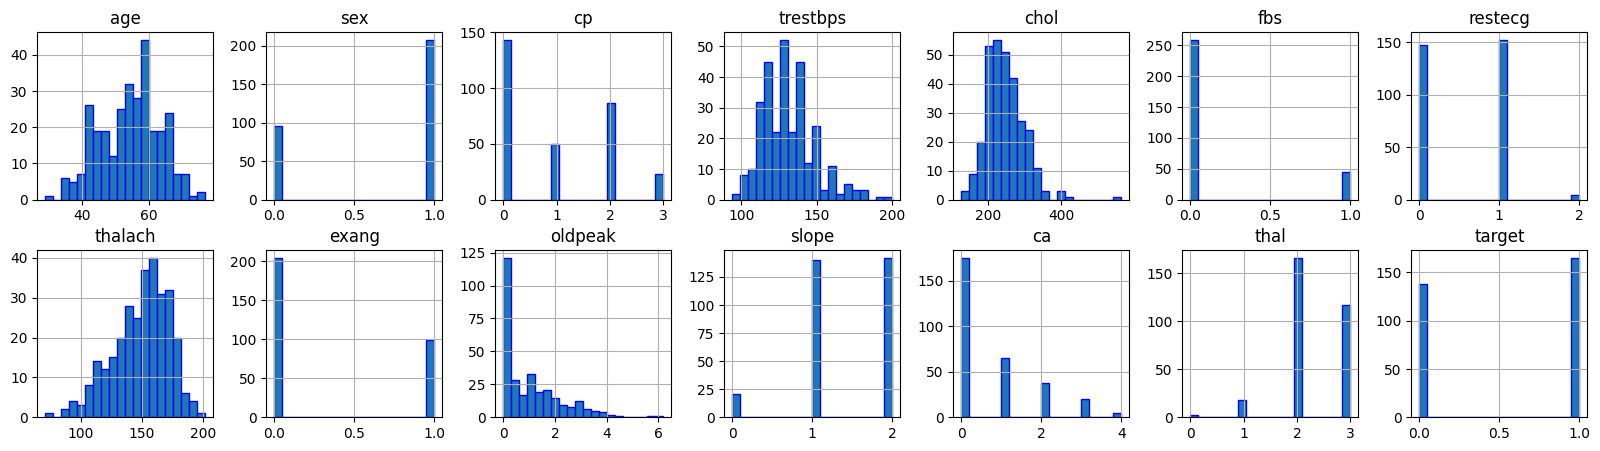

In [ ]:
data.hist(figsize=(20,5), layout=(-1, 7), bins=20, edgecolor='b');

9 признаков - категориальные, 5 - количественные

## Преобразование типов данных

Сделаем категориальные признаки типом данных object.


In [ ]:
continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

categorical = [feature for feature in data.columns if feature not in continuous]

In [ ]:
data[categorical] = data[categorical].astype('object')

data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

## Проверка на дубли

In [ ]:
duplicates = data[data.duplicated()]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
data = data.drop_duplicates()

## Визуализация распределения количественных переменных (возраст, уровень холестерина) с помощью box plot и гистограмм

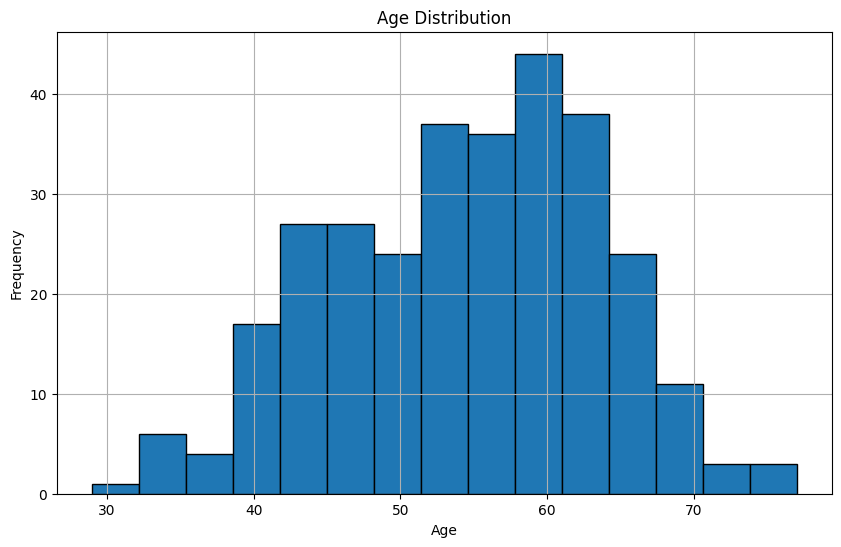

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=15, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

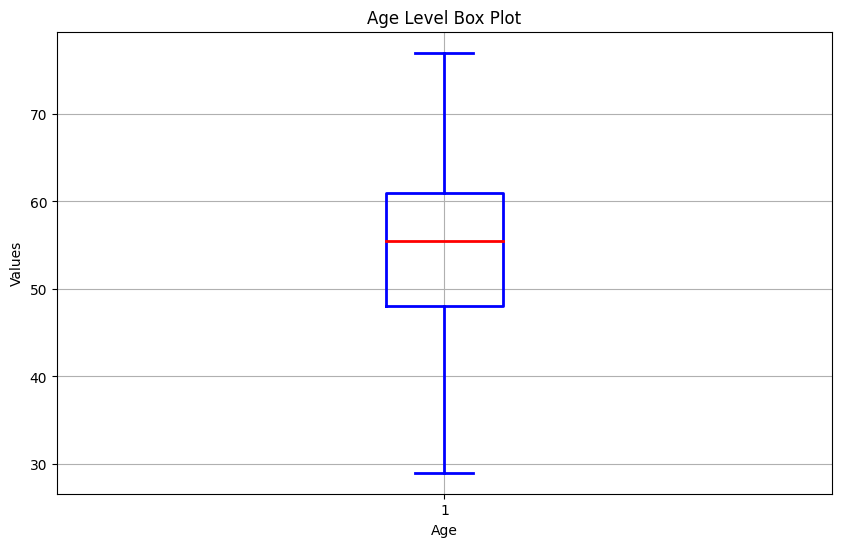

In [ ]:
plt.figure(figsize=(10, 6))
boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linewidth=2)
capprops = dict(color='blue', linewidth=2)
flierprops = dict(marker='o', color='blue', markersize=5)

plt.boxplot(data['age'], boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

plt.title('Age Level Box Plot')
plt.xlabel('Age')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Распределение возраста в данных близко к нормальному. Имеет некоторые особенности, такие как несколько пиков, что может указывать на мультимодальность.

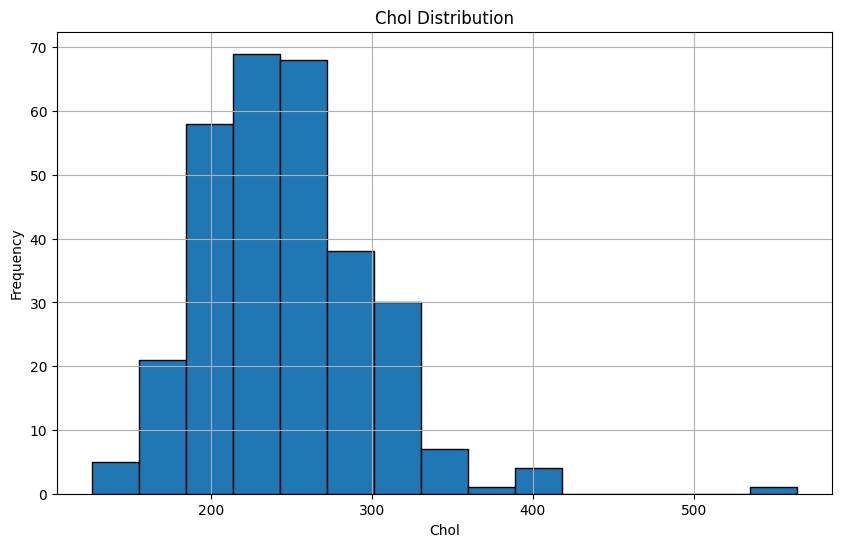

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['chol'], bins=15, edgecolor='black')
plt.title('Сhol Distribution')
plt.xlabel('Сhol')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

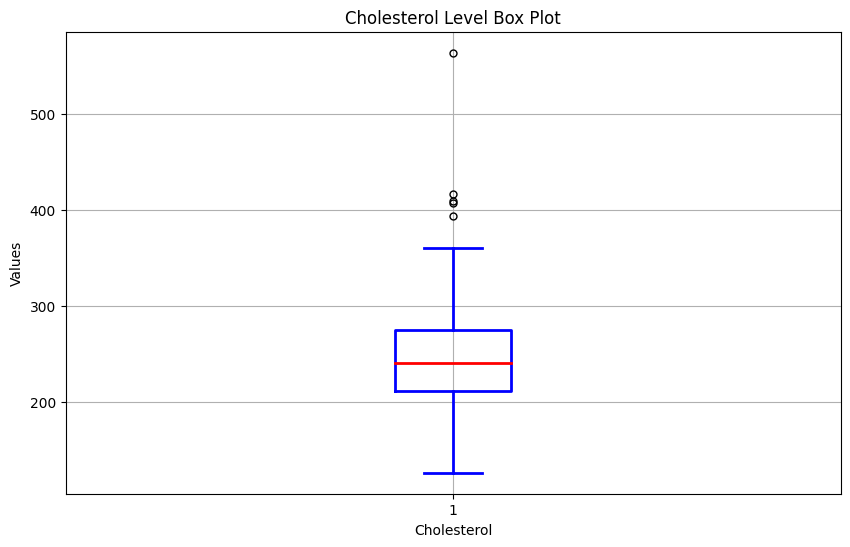

In [ ]:
plt.figure(figsize=(10, 6))
boxprops = dict(color='blue', linewidth=2)
medianprops = dict(color='red', linewidth=2)
whiskerprops = dict(color='blue', linewidth=2)
capprops = dict(color='blue', linewidth=2)
flierprops = dict(marker='o', color='blue', markersize=5)

plt.boxplot(data['chol'], boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops)

plt.title('Cholesterol Level Box Plot')
plt.xlabel('Cholesterol')
plt.ylabel('Values')
plt.grid(True)
plt.show()

Распределение уровня холестерина скошено вправо.
Есть выбросы.

## Построить столбчатые диаграммы для анализа распределения категориальных переменных (пол, тип боли в груди)

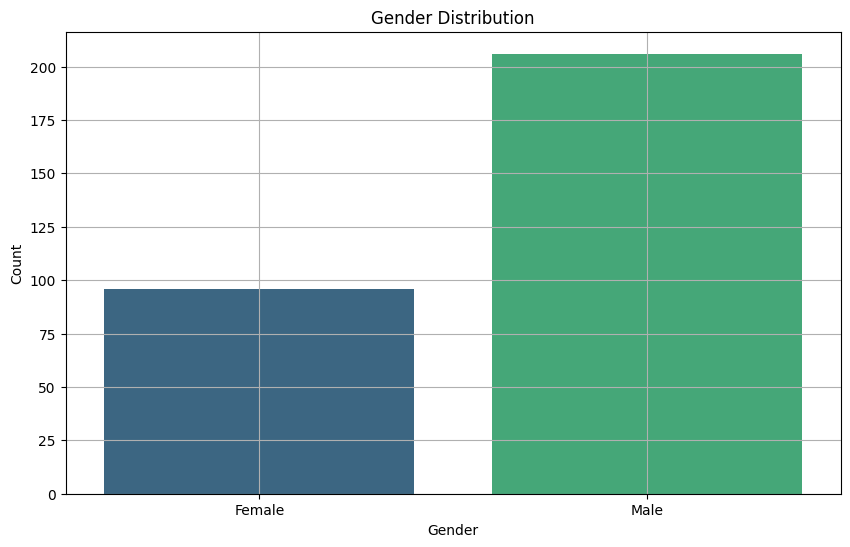

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.grid(True)
plt.show()

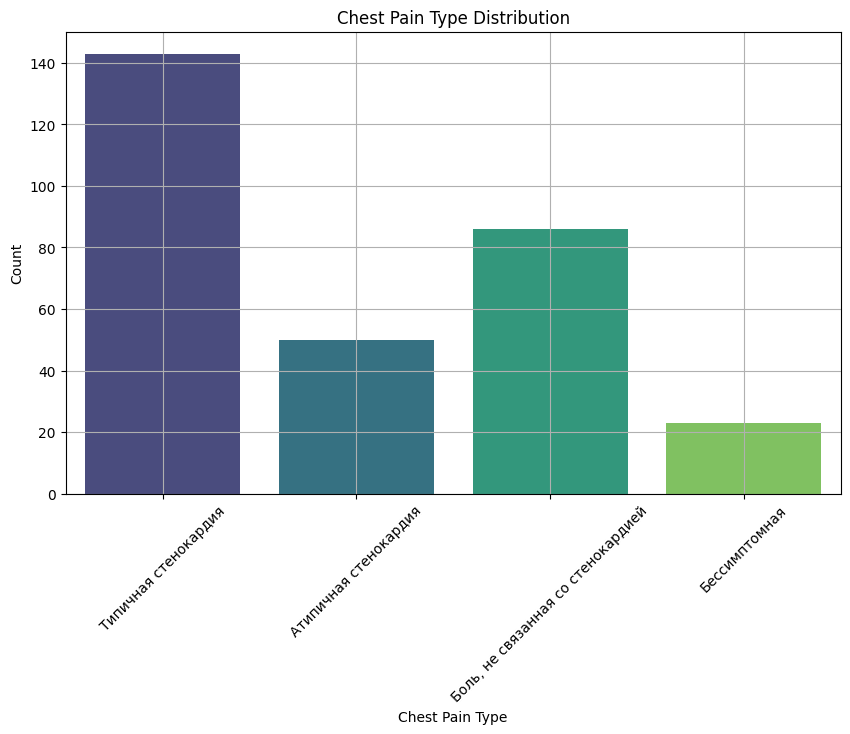

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cp', data=data, palette='viridis')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Типичная стенокардия', 'Атипичная стенокардия', 'Боль, не связанная со стенокардией', 'Бессимптомная'] , rotation=45)
plt.grid(True)
plt.show()

По полу, мужчин примерно в два раза больше, чем женщин.

По типу боли, больше всего пациентов с болью вследствие типичной стенокардии.

# Задание 2.

Вам предстоит провести эксперименты с моделью машинного обучения и
изучить процесс кросс-валидации и подбора гиперпараметров. Ваша задача
состоит в следующем:
1. Загрузите набор данных, подходящий для задачи классификации или
регрессии. Вы можете использовать любой набор данных,
предоставленный в библиотеке scikit-learn или другом доступном
источнике данных.
2. Разделите данные на обучающую и тестовую выборки с помощью
функции train_test_split из библиотеки scikit-learn.
3. Создайте модель машинного обучения, которую вы хотите использовать
для предсказания на этом наборе данных. Например, можно
использовать модель линейной регрессии или случайный лес для
задачи регрессии, или модель логистической регрессии или случайный
лес для задачи классификации.
4. Используйте метод кросс-валидации, чтобы оценить
производительность модели на обучающей выборке. Например, можно
использовать метод cross_val_score из библиотеки scikit-learn с
использованием метрики оценки, такой как точность (accuracy) или
среднеквадратичная ошибка (mean squared error).
5. Проведите подбор гиперпараметров модели с помощью метода
GridSearchCV из библиотеки scikit-learn. Этот метод позволяет
перебирать различные значения гиперпараметров и выбирать
наилучшие значения на основе кросс-валидации.
6. Обучите модель с использованием оптимальных гиперпараметров на
обучающей выборке и оцени ее производительность на тестовой
выборке.
7. Проведите анализ результатов и сделай выводы о процессе
кросс-валидации и подборе гиперпараметров в задачах машинного
обучения.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

Для задания №2 был выбран датасет с данными когорты педиатрических пациентов с подозрением на аппендицит, поступивших с болью в животе в детскую больницу Святой Хедвиги в Регенсбурге, Германия, в период с 2016 по 2021 год. (https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis)

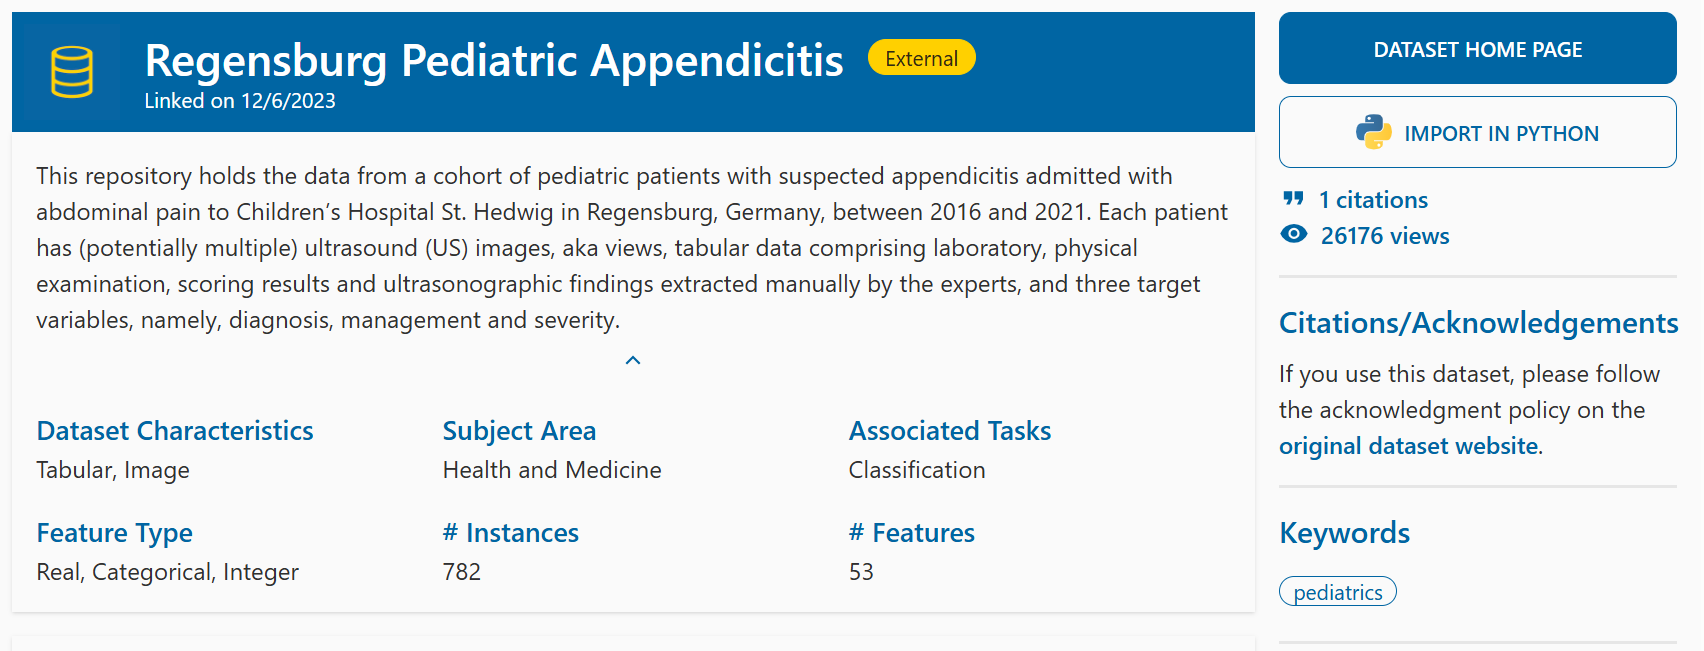

## 1.Загрузите набор данных.

In [ ]:
data2 = pd.read_excel('drive/MyDrive/Итоговый/app_data.xlsx')

In [ ]:
data2.head(5)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN




---


Таргет - Диагноз (Diagnosis). Есть аппендицит, нет аппендицита.

Задача - определить класс диагностического решения - бинарная классификация.


---



## EDA

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix



---


17 количественных признаков, 39 категориальных

У таргета отсутствует два значения. Удалим эти строки.


---



In [ ]:
data2 = data2.dropna(subset = ['Diagnosis'])

In [ ]:
data2.isna().sum()

Age                                   0
BMI                                  26
Sex                                   1
Height                               25
Weight                                2
Length_of_Stay                        3
Management                            0
Severity                              0
Diagnosis_Presumptive                 1
Diagnosis                             0
Alvarado_Score                       50
Paedriatic_Appendicitis_Score        50
Appendix_on_US                        3
Appendix_Diameter                   282
Migratory_Pain                        7
Lower_Right_Abd_Pain                  6
Contralateral_Rebound_Tenderness     13
Coughing_Pain                        14
Nausea                                6
Loss_of_Appetite                      8
Body_Temperature                      5
WBC_Count                             4
Neutrophil_Percentage               101
Segmented_Neutrophils               726
Neutrophilia                         48


В датасете много пропусков.

Будем формировать список для удаления неинформативных колонок, обрабатывать пропуски.

Посмотрим признаки с пропусками в процентном соотношении.

In [ ]:
null = data2.isna().sum()/len(data2) * 100
null = pd.DataFrame({'feature':null.index, 'null_percentage':null}).sort_values(by='null_percentage', ascending=False).reset_index(drop=True)

In [ ]:
null

,feature,null_percentage
0,Abscess_Location,98.333333
1,Gynecological_Findings,96.666667
2,Conglomerate_of_Bowel_Loops,94.487179
3,Segmented_Neutrophils,93.076923
4,Ileus,92.307692
5,Perfusion,91.923077
6,Enteritis,91.538462
7,Appendicolith,91.153846
8,Coprostasis,90.897436
9,Perforation,89.615385




---


Подробно будем рассматривать признаки с пропусками > 10 %


---



In [ ]:
# список колонок для удаления
for_drop = []

Признак Abscess_Location (локация абсцесса) заполнен всего 13-ю строками со значениями (Douglas, retrovesikal, rechter Unterbauch, perityphlitisch, an den M. psoas rechts). Признак неинформативен.

In [ ]:
for_drop.append('Abscess_Location')

Признак Gynecological Findings (уточнения по геникологии) заполнен 26-ю строками. У половины из списка найдены кисты яичников. Слишком мало для информативности.

In [ ]:
for_drop.append('Gynecological_Findings')

Признак Conglomerate_of_Bowel_Loops (конгломерат кишечника) заполнен на 43 строчках. Значения yes, no. Неинформативен.

In [ ]:
for_drop.append('Conglomerate_of_Bowel_Loops')

Признак Segmented_Neutrophils (Сегментированные нейтрофилы) 54 строки заполнено. Численные значения. Указывают на воспалительный процесс в организме. Нет гарантии, что этот процесс - аппендицит.

In [ ]:
for_drop.append('Segmented_Neutrophils')

Признак Ileus (Кишечная непроходимость) 60 строк заполнено. Значения yes, no. Кишечная непроходимость прямо не указывает на аппендицит.

In [ ]:
for_drop.append('Ileus')

Признак Perfusion (Перфузия) - метод подведения и пропускания крови, кровезамещающих растворов и биологически активных веществ через сосудистую систему органов и тканей организма. 63 значения. Хоть этот метод проводится на аппендиксе и у 61 из 63 пациентов диагностирован аппендицит, все равно 63 значения из 782 это очень мало. Замену на моду считаю неправильной.

In [ ]:
for_drop.append('Perfusion')

Признак Enteritis (воспаление в области тонкого кишечника). Аппендикс является частью слепой кишки, не тонкого кишечника.

In [ ]:
for_drop.append('Enteritis')

Признак Appendicolith (Аппендиколит) это образование, которое формируется из-за кальцифицированных отложений в аппендиксе, состоящих из плотных каловых масс и иногда минеральных отложений 69 значений. Признак является прямым предшественником аппендицита.

In [ ]:
df_colith = data2[data2['Appendicolith'] == 'yes']

In [ ]:
df_colith['Diagnosis']

39     appendicitis
74     appendicitis
347    appendicitis
466    appendicitis
488    appendicitis
492    appendicitis
513    appendicitis
521    appendicitis
533    appendicitis
534    appendicitis
538    appendicitis
548    appendicitis
553    appendicitis
554    appendicitis
563    appendicitis
574    appendicitis
586    appendicitis
589    appendicitis
590    appendicitis
593    appendicitis
599    appendicitis
607    appendicitis
612    appendicitis
622    appendicitis
651    appendicitis
670    appendicitis
685    appendicitis
697    appendicitis
720    appendicitis
722    appendicitis
755    appendicitis
759    appendicitis
763    appendicitis
Name: Diagnosis, dtype: object

Считаю, что если у пациента диагноституется Аппендиколит, то этот факт обязательно указывается в истории болезни. Значит, пропуски заполняем значением 'no'.

In [ ]:
data2['Appendicolith'].fillna('no', inplace=True)

In [ ]:
data2['Appendicolith'].value_counts()

Appendicolith
no           744
yes           33
suspected      3
Name: count, dtype: int64

Признак Coprostasis (Скопление каловых масс в толстой кишке кишечника).

In [ ]:
data2_copro = data2[data2['Coprostasis'] == 'yes']

In [ ]:
data2_copro['Diagnosis']

22     no appendicitis
29        appendicitis
40        appendicitis
46     no appendicitis
66     no appendicitis
67     no appendicitis
101    no appendicitis
104       appendicitis
141    no appendicitis
183       appendicitis
214    no appendicitis
224    no appendicitis
253       appendicitis
256       appendicitis
260    no appendicitis
281    no appendicitis
283       appendicitis
286    no appendicitis
288    no appendicitis
311    no appendicitis
317    no appendicitis
325    no appendicitis
344    no appendicitis
354    no appendicitis
356    no appendicitis
410    no appendicitis
434       appendicitis
445    no appendicitis
463    no appendicitis
465    no appendicitis
470    no appendicitis
475       appendicitis
485       appendicitis
524       appendicitis
547       appendicitis
560       appendicitis
571       appendicitis
594       appendicitis
633       appendicitis
637       appendicitis
650       appendicitis
651       appendicitis
672       appendicitis
694       a

Считаю, что признак неинформативен, прямой зависимости с таргетом нет.

In [ ]:
for_drop.append('Coprostasis')

Признак Perforation (Признаки перфорации аппендикса при УЗИ)

In [ ]:
data2_per = data2[data2['Perforation'] == 'yes']
data2_per['Diagnosis']

449    appendicitis
500    appendicitis
536    appendicitis
543    appendicitis
547    appendicitis
550    appendicitis
553    appendicitis
560    appendicitis
561    appendicitis
562    appendicitis
563    appendicitis
565    appendicitis
569    appendicitis
582    appendicitis
607    appendicitis
615    appendicitis
647    appendicitis
649    appendicitis
650    appendicitis
651    appendicitis
655    appendicitis
670    appendicitis
698    appendicitis
736    appendicitis
741    appendicitis
743    appendicitis
744    appendicitis
748    appendicitis
753    appendicitis
Name: Diagnosis, dtype: object

In [ ]:
data2_per = data2[data2['Perforation'] == 'no']
data2_per['Diagnosis']

0         appendicitis
15     no appendicitis
47        appendicitis
50        appendicitis
51     no appendicitis
67     no appendicitis
121       appendicitis
127       appendicitis
129       appendicitis
138       appendicitis
150    no appendicitis
164       appendicitis
245       appendicitis
334       appendicitis
398       appendicitis
492       appendicitis
494       appendicitis
496       appendicitis
513       appendicitis
514       appendicitis
522       appendicitis
523       appendicitis
524       appendicitis
529       appendicitis
555       appendicitis
568       appendicitis
575       appendicitis
576       appendicitis
583       appendicitis
618       appendicitis
623       appendicitis
625       appendicitis
749       appendicitis
768       appendicitis
Name: Diagnosis, dtype: object

In [ ]:
data2.groupby('Perforation')['Diagnosis'].value_counts()

Perforation   Diagnosis      
no            appendicitis       30
              no appendicitis     4
not excluded  appendicitis       15
suspected     appendicitis        2
              no appendicitis     1
yes           appendicitis       29
Name: count, dtype: int64

Перфорация аппендикса прямое следствие аппендицита. Удалять колонку нельзя. Практически все заполненные значения признака Перфорации относятся к диагнозу аппендицит. Пропуски заполняем значением suspected, у которого более сбалансированы варианты диагноза.

In [ ]:
data2['Perforation'].fillna('suspected', inplace=True)

In [ ]:
data2['Perforation'].value_counts()

Perforation
suspected       702
no               34
yes              29
not excluded     15
Name: count, dtype: int64

Признак Appendicular_Abscess (Аппендикулярный абсцесс) - осложнение острого аппендицита.

In [ ]:
data2_app = data2[data2['Appendicular_Abscess'] == 'no']
data2_app['Diagnosis']

0         appendicitis
15     no appendicitis
37     no appendicitis
41        appendicitis
78        appendicitis
            ...       
757       appendicitis
766       appendicitis
768       appendicitis
772       appendicitis
781       appendicitis
Name: Diagnosis, Length: 65, dtype: object

In [ ]:
data2.groupby('Appendicular_Abscess')['Diagnosis'].value_counts()

Appendicular_Abscess  Diagnosis      
no                    appendicitis       56
                      no appendicitis     9
suspected             appendicitis        1
yes                   appendicitis       19
Name: count, dtype: int64

Признак Appendicular_Abscess не следует удалять, так как он является следствием аппендицита. Заменим пропуски значением 'not excluded' (не исключено), которое не нарушит баланс признака и сохранит связь с таргетом.

In [ ]:
data2['Appendicular_Abscess'].fillna('not excluded', inplace=True)
data2['Appendicular_Abscess'].value_counts()

Appendicular_Abscess
not excluded    695
no               65
yes              19
suspected         1
Name: count, dtype: int64

Признак Bowel_Wall_Thickening (Утолщение внутренней стенки кишечника). 99 значений заполнено. Удаляем.

In [ ]:
for_drop.append('Bowel_Wall_Thickening')

Признак Lymph_Nodes_Location (Расположение лимфатических узлов)

In [ ]:
data2.groupby('Lymph_Nodes_Location')['Diagnosis'].value_counts()

Lymph_Nodes_Location            Diagnosis      
Ileozökal                       appendicitis        1
Lymphadenopathie                appendicitis        1
MB                              no appendicitis     2
Mesenterial, links inguinal     appendicitis        1
Ovarialzysten                   appendicitis        1
UB                              no appendicitis     1
ileocoecal                      appendicitis        2
                                no appendicitis     1
ileocoekal                      appendicitis        1
ileocöcal                       appendicitis        2
inguinal                        appendicitis        1
lokal um die Appendix           appendicitis        1
mesenterial                     no appendicitis    29
                                appendicitis        8
mesenterial, re UB              appendicitis        1
multiple Lokalisationen         appendicitis        1
periappendikulär                appendicitis        1
periumbilikal                   no

По распределению диагноза по группам локации лимфоузлов видно, что в большинстве случаев пациенты с аппендицитом имеют увеличенные узлы "rechter Unterbauch", а без аппендицита - 'mesenterial'. Заполним пропуски таким образом.

In [ ]:
data2.loc[(data2['Lymph_Nodes_Location'].isna()) & (data2['Diagnosis'] == 'appendicitis'), 'Lymph_Nodes_Location'] = 'rechter Unterbauch'
data2.loc[(data2['Lymph_Nodes_Location'].isna()) & (data2['Diagnosis'] == 'no appendicitis'), 'Lymph_Nodes_Location'] = 'mesenterial'
data2['Lymph_Nodes_Location'].value_counts()

Lymph_Nodes_Location
rechter Unterbauch                424
mesenterial                       292
re UB                              22
reUB                               12
re MB                               3
ileocoecal                          3
re UB                               2
rechter Unter- und Mittelbauch      2
ileocöcal                           2
MB                                  2
inguinal                            1
Mesenterial, links inguinal         1
lokal um die Appendix               1
multiple Lokalisationen             1
Lymphadenopathie                    1
periappendikulär                    1
Ileozökal                           1
periumbilikal                       1
re UB, re MB                        1
UB                                  1
re UB, ileocoecal                   1
re UB                               1
re UB, periumbilikal                1
mesenterial, re UB                  1
ileocoekal                          1
Ovarialzysten                

Признак Target_Sign (Аксиальное изображение аппендикса с заполненным жидкостью центром, окруженным эхогенной и подслизистой оболочкой и гипоэхогенной мускулатурой). 138 значений заполнено.

In [ ]:
data2.groupby('Target_Sign')['Diagnosis'].value_counts()

Target_Sign  Diagnosis      
no           no appendicitis    26
             appendicitis       25
yes          appendicitis       82
             no appendicitis     5
Name: count, dtype: int64

Заменим пропуски Target_Sign в зависимости от Diagnosis: appendicitis - yes, no appendicitis - not excluded.

In [ ]:
data2.loc[(data2['Target_Sign'].isna()) & (data2['Diagnosis'] == 'appendicitis'), 'Target_Sign'] = 'yes'
data2.loc[(data2['Target_Sign'].isna()) & (data2['Diagnosis'] == 'no appendicitis'), 'Target_Sign'] = 'not excluded'
data2['Target_Sign'].value_counts()

Target_Sign
yes             443
not excluded    286
no               51
Name: count, dtype: int64

Признак Meteorism.

In [ ]:
data2.groupby('Meteorism')['Diagnosis'].value_counts()

Meteorism  Diagnosis      
no         appendicitis       11
yes        no appendicitis    70
           appendicitis       59
Name: count, dtype: int64

Признак удаляем.

In [ ]:
for_drop.append('Meteorism')

Признак Pathological_Lymph_Nodes (Увеличенные и воспаленные внутрибрюшные лимфатические узлы)

In [ ]:
data2.groupby('Pathological_Lymph_Nodes')['Diagnosis'].value_counts()

Pathological_Lymph_Nodes  Diagnosis      
no                        appendicitis       29
                          no appendicitis    20
yes                       appendicitis       82
                          no appendicitis    72
Name: count, dtype: int64

Неинформативный признак. Удаляем.

In [ ]:
for_drop.append('Pathological_Lymph_Nodes')

Признак Appendix_Wall_Layers (Распределение и характеристики слоев аппендикса, например, неравномерность при нарастающем воспалении)

In [ ]:
data2.groupby('Appendix_Wall_Layers')['Diagnosis'].value_counts()

Appendix_Wall_Layers  Diagnosis      
intact                appendicitis       102
                      no appendicitis     30
partially raised      appendicitis         9
raised                appendicitis        73
                      no appendicitis      3
upset                 appendicitis         1
Name: count, dtype: int64

Заменим пропуски на признак intact (неповрежденный). Распределение диагноза по этому признаку ~ 1/3

In [ ]:
data2['Appendix_Wall_Layers'].fillna('intact', inplace=True)
data2['Appendix_Wall_Layers'].value_counts()

Appendix_Wall_Layers
intact              694
raised               76
partially raised      9
upset                 1
Name: count, dtype: int64

Признак Surrounding_Tissue_Reaction (Признаки воспаления в тканях (в т.ч. в сальнике/жировой ткани), окружающих аппендикс)

In [ ]:
data2.groupby('Surrounding_Tissue_Reaction')['Diagnosis'].value_counts()

Surrounding_Tissue_Reaction  Diagnosis      
no                           appendicitis        28
                             no appendicitis     16
yes                          appendicitis       196
                             no appendicitis     12
Name: count, dtype: int64

Чтобы исключить ошибку второго рода (пропустить аппендицит там, где он есть) заменим пропуски на yes.

In [ ]:
data2['Surrounding_Tissue_Reaction'].fillna('yes', inplace=True)
data2['Surrounding_Tissue_Reaction'].value_counts()

Surrounding_Tissue_Reaction
yes    736
no      44
Name: count, dtype: int64

Признак Appendix_Diameter (Максимальный наружный диаметр аппендикса)

In [ ]:
data2.groupby('Appendix_Diameter')['Diagnosis'].value_counts()

Appendix_Diameter  Diagnosis      
2.7                no appendicitis    1
2.9                no appendicitis    1
3.0                no appendicitis    2
3.2                no appendicitis    1
3.5                no appendicitis    5
                                     ..
13.0               appendicitis       8
13.2               appendicitis       1
14.0               appendicitis       5
15.0               appendicitis       4
17.0               appendicitis       1
Name: count, Length: 95, dtype: int64

Порог 6 мм. Заменим медианой.

In [ ]:
median_value = data2['Appendix_Diameter'].median()
data2['Appendix_Diameter'].fillna(median_value, inplace=True)
data2['Appendix_Diameter'].value_counts()

Appendix_Diameter
7.5    292
8.0     47
9.0     46
7.0     43
6.0     42
      ... 
9.6      1
5.7      1
8.4      1
9.3      1
8.6      1
Name: count, Length: 78, dtype: int64

Признак RBC_in_Urine (Количество эритроцитов в единице объема мочи)

In [ ]:
data2.groupby('RBC_in_Urine')['Diagnosis'].value_counts()

RBC_in_Urine  Diagnosis      
+             appendicitis        50
              no appendicitis     38
++            appendicitis         9
              no appendicitis      7
+++           appendicitis        20
              no appendicitis     10
no            appendicitis       238
              no appendicitis    204
Name: count, dtype: int64

Заменим пропуски на значение "no"

In [ ]:
data2['RBC_in_Urine'].fillna('no', inplace=True)
data2['RBC_in_Urine'].value_counts()

RBC_in_Urine
no     646
+       88
+++     30
++      16
Name: count, dtype: int64

Признак Ketones_in_Urine (Кетоны в моче)

In [ ]:
data2.groupby('Ketones_in_Urine')['Diagnosis'].value_counts()

Ketones_in_Urine  Diagnosis      
+                 appendicitis        50
                  no appendicitis     27
++                appendicitis        29
                  no appendicitis     20
+++               appendicitis        86
                  no appendicitis     38
no                no appendicitis    179
                  appendicitis       153
Name: count, dtype: int64

Заменим пропуски на значение "no"

In [ ]:
data2['Ketones_in_Urine'].fillna('no', inplace=True)
data2['Ketones_in_Urine'].value_counts()

Ketones_in_Urine
no     530
+++    124
+       77
++      49
Name: count, dtype: int64

Признак WBC_in_Urine (Лейкоциты в моче)

In [ ]:
data2.groupby('WBC_in_Urine')['Diagnosis'].value_counts()

WBC_in_Urine  Diagnosis      
+             appendicitis        30
              no appendicitis     21
++            appendicitis        11
              no appendicitis      8
+++           appendicitis         8
              no appendicitis      4
no            appendicitis       270
              no appendicitis    231
Name: count, dtype: int64

Заменим пропуски на значение "no"

In [ ]:
data2['WBC_in_Urine'].fillna('no', inplace=True)
data2['WBC_in_Urine'].value_counts()

WBC_in_Urine
no     698
+       51
++      19
+++     12
Name: count, dtype: int64

Признак Ipsilateral_Rebound_Tenderness (Состояние, при котором ощущается боль ипсилатеральной стороны при снятии давления над животом)

In [ ]:
data2.groupby('Ipsilateral_Rebound_Tenderness')['Diagnosis'].value_counts()

Ipsilateral_Rebound_Tenderness  Diagnosis      
no                              no appendicitis    304
                                appendicitis       277
yes                             appendicitis        28
                                no appendicitis     10
Name: count, dtype: int64

Заменим пропуски на "не определено". Это сохранит важный диагностический признак и не собьёт баланс класса.

In [ ]:
data2['Ipsilateral_Rebound_Tenderness'].fillna('not excluded', inplace=True)
data2['Ipsilateral_Rebound_Tenderness'].value_counts()

Ipsilateral_Rebound_Tenderness
no              581
not excluded    161
yes              38
Name: count, dtype: int64

Признак Neutrophil_Percentage (Процент нейтрофилов)

In [ ]:
data2.groupby('Neutrophil_Percentage')['Diagnosis'].value_counts()

Neutrophil_Percentage  Diagnosis      
27.2                   no appendicitis    1
29.5                   appendicitis       1
29.7                   appendicitis       1
32.2                   no appendicitis    1
35.1                   no appendicitis    1
                                         ..
93.8                   no appendicitis    1
93.9                   appendicitis       1
94.1                   appendicitis       1
94.2                   appendicitis       1
97.7                   appendicitis       1
Name: count, Length: 456, dtype: int64

Заменяет пропуски медианой.

In [ ]:
median_value = data2['Neutrophil_Percentage'].median()
data2['Neutrophil_Percentage'].fillna(median_value, inplace=True)
data2['Neutrophil_Percentage'].value_counts()

Neutrophil_Percentage
75.5    106
79.0      8
84.0      7
68.4      7
84.5      7
       ... 
44.1      1
60.6      1
43.0      1
87.2      1
68.5      1
Name: count, Length: 355, dtype: int64

**Удаление неинформативных колонок.**

In [ ]:
data2 = data2.drop(for_drop, axis=1)

In [ ]:
data2.isna().sum()

Age                                  0
BMI                                 26
Sex                                  1
Height                              25
Weight                               2
Length_of_Stay                       3
Management                           0
Severity                             0
Diagnosis_Presumptive                1
Diagnosis                            0
Alvarado_Score                      50
Paedriatic_Appendicitis_Score       50
Appendix_on_US                       3
Appendix_Diameter                    0
Migratory_Pain                       7
Lower_Right_Abd_Pain                 6
Contralateral_Rebound_Tenderness    13
Coughing_Pain                       14
Nausea                               6
Loss_of_Appetite                     8
Body_Temperature                     5
WBC_Count                            4
Neutrophil_Percentage                0
Neutrophilia                        48
RBC_Count                           16
Hemoglobin               

**Остальные пропуски заменим медианой или модой.**

In [ ]:
missing_columns = data2.columns[data2.isnull().any()].tolist()
missing_columns

['BMI',
 'Sex',
 'Height',
 'Weight',
 'Length_of_Stay',
 'Diagnosis_Presumptive',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Body_Temperature',
 'WBC_Count',
 'Neutrophilia',
 'RBC_Count',
 'Hemoglobin',
 'RDW',
 'Thrombocyte_Count',
 'CRP',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'US_Performed',
 'US_Number',
 'Free_Fluids']

In [ ]:
column_types = data2.dtypes

In [ ]:
print("Типы данных колонок:\n", column_types)

Типы данных колонок:
 Age                                 float64
BMI                                 float64
Sex                                  object
Height                              float64
Weight                              float64
Length_of_Stay                      float64
Management                           object
Severity                             object
Diagnosis_Presumptive                object
Diagnosis                            object
Alvarado_Score                      float64
Paedriatic_Appendicitis_Score       float64
Appendix_on_US                       object
Appendix_Diameter                   float64
Migratory_Pain                       object
Lower_Right_Abd_Pain                 object
Contralateral_Rebound_Tenderness     object
Coughing_Pain                        object
Nausea                               object
Loss_of_Appetite                     object
Body_Temperature                    float64
WBC_Count                           float64
Neutrophil

In [ ]:
# разделим количественные и качественные колонки
cat_columns = ['Sex',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Neutrophilia',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'US_Performed',
 'Free_Fluids',
  'Diagnosis_Presumptive']

num_columns = ['Age',
  'BMI',
 'Height',
 'Weight',
 'Length_of_Stay',
 'Alvarado_Score',
 'Paedriatic_Appendicitis_Score',
 'Appendix_Diameter',
 'Body_Temperature',
 'WBC_Count',
  'Neutrophil_Percentage',
 'RBC_Count',
 'Hemoglobin',
 'RDW',
 'Thrombocyte_Count',
 'CRP',
  'US_Number']

In [ ]:
# замена на моду
for column in cat_columns:
    mode = data2[column].mode()[0]  # Найти моду
    data2[column].fillna(mode, inplace=True)

In [ ]:
# замена на медиану
for column in num_columns:
    median = data2[column].median()  # Найти медиану
    data2[column].fillna(median, inplace=True)

In [ ]:
data2.isna().sum()

Age                                 0
BMI                                 0
Sex                                 0
Height                              0
Weight                              0
Length_of_Stay                      0
Management                          0
Severity                            0
Diagnosis_Presumptive               0
Diagnosis                           0
Alvarado_Score                      0
Paedriatic_Appendicitis_Score       0
Appendix_on_US                      0
Appendix_Diameter                   0
Migratory_Pain                      0
Lower_Right_Abd_Pain                0
Contralateral_Rebound_Tenderness    0
Coughing_Pain                       0
Nausea                              0
Loss_of_Appetite                    0
Body_Temperature                    0
WBC_Count                           0
Neutrophil_Percentage               0
Neutrophilia                        0
RBC_Count                           0
Hemoglobin                          0
RDW         

**Проверка на однородность колонок.**

In [ ]:
for i in data2.columns:
  if len(data2[i].value_counts() == 1):
    print(i, len(data2[i].value_counts()))

Age 714
BMI 639
Sex 2
Height 187
Weight 269
Length_of_Stay 19
Management 4
Severity 2
Diagnosis_Presumptive 16
Diagnosis 2
Alvarado_Score 11
Paedriatic_Appendicitis_Score 11
Appendix_on_US 2
Appendix_Diameter 78
Migratory_Pain 2
Lower_Right_Abd_Pain 2
Contralateral_Rebound_Tenderness 2
Coughing_Pain 2
Nausea 2
Loss_of_Appetite 2
Body_Temperature 46
WBC_Count 210
Neutrophil_Percentage 355
Neutrophilia 2
RBC_Count 171
Hemoglobin 65
RDW 53
Thrombocyte_Count 260
Ketones_in_Urine 4
RBC_in_Urine 4
WBC_in_Urine 4
CRP 151
Dysuria 2
Stool 4
Peritonitis 3
Psoas_Sign 2
Ipsilateral_Rebound_Tenderness 3
US_Performed 2
US_Number 759
Free_Fluids 2
Appendix_Wall_Layers 4
Target_Sign 3
Appendicolith 3
Perforation 4
Surrounding_Tissue_Reaction 2
Appendicular_Abscess 4
Lymph_Nodes_Location 26


**Распределение целевого признака.**

In [ ]:
data2.Diagnosis.value_counts()

Diagnosis
appendicitis       463
no appendicitis    317
Name: count, dtype: int64



---


Баланс классов соблюден.


---



In [ ]:
# Убираем признак Management, из-за большой корреляции с таргетом
data2 = data2.drop('Management', axis=1)

## 2.Разделите данные на обучающую и тестовую выборки.

Преобразование категориалных переменных в числовые с использованием One-Hot Encoding.

In [ ]:
cat_columns = ['Sex',
 'Appendix_on_US',
 'Migratory_Pain',
 'Lower_Right_Abd_Pain',
 'Contralateral_Rebound_Tenderness',
 'Coughing_Pain',
 'Nausea',
 'Loss_of_Appetite',
 'Neutrophilia',
 'Dysuria',
 'Stool',
 'Peritonitis',
 'Psoas_Sign',
 'US_Performed',
 'Free_Fluids',
 'Diagnosis_Presumptive',
  'Ketones_in_Urine',
  'RBC_in_Urine',
  'WBC_in_Urine',
  'Ipsilateral_Rebound_Tenderness',
   'Appendix_Wall_Layers',
  'Target_Sign',
  'Appendicolith',
  'Perforation',
  'Surrounding_Tissue_Reaction',
  'Appendicular_Abscess',
  'Lymph_Nodes_Location',
  'Severity']

In [ ]:
df_encoded = pd.get_dummies(data2, columns=cat_columns, drop_first=True)

In [ ]:
X = df_encoded.drop('Diagnosis', axis=1)
y = df_encoded.Diagnosis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 3.Создайте модель машинного обучения.

Для задачи бинарной классификации используем модель логистической регрессии.

In [ ]:
lg_model = LogisticRegression(random_state=42, max_iter=10000)

In [ ]:
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   appendicitis       0.99      0.99      0.99       112
no appendicitis       0.99      0.99      0.99        83

       accuracy                           0.99       195
      macro avg       0.99      0.99      0.99       195
   weighted avg       0.99      0.99      0.99       195





---


Accuracy и f1-score = 0.99 - это очень хороший показатель производительности модели.


---



## 4.Используйте метод кросс-валидации, чтобы оценить производительность модели на обучающей выборке.

Кросс-валидация позволяет разделить данные на несколько подвыборок, чтобы модель могла обучаться и тестироваться на разных частях данных.

In [ ]:
# Выполнение кросс-валидации
cv_scores = cross_val_score(lg_model, X, y, cv=5)

In [ ]:
# Оценка производительности модели
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation of CV Accuracy: {cv_scores.std()}')

Cross-Validation Accuracy Scores: [0.91025641 0.98076923 1.         0.98717949 0.99358974]
Mean CV Accuracy: 0.9743589743589745
Standard Deviation of CV Accuracy: 0.03268602252303068




---


Показатели Accuracy всех 5-ти подвыборок очень высоки. Есть даже единица.


---



## 5.Проведите подбор гиперпараметров модели с помощью метода GridSearchCV.

Этот метод позволяет перебрать различные комбинации гиперпараметров и выбрать лучшие из них на основе кросс-валидации.

In [ ]:
# Определение метрики accuracy для GridSearchCV
accuracy_scorer = make_scorer(accuracy_score)

In [ ]:
# Определение гиперпараметров для подбора
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 1000, 10000]
}

In [ ]:
# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring=accuracy_scorer, cv=5, n_jobs=-1)


In [ ]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 1000, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring=make_scorer(accuracy_score))

In [ ]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Accuracy Score: {grid_search.best_score_}')

Best Parameters: {'C': 10, 'max_iter': 100, 'solver': 'liblinear'}
Best Accuracy Score: 0.9820512820512821


Best accuracy без подбора гиперпараметров: 1.

Best accuracy с подбором гиперпараметров: 0.9820512820512821

Метрика модели оказывается ниже при использовании GridSearchCV по сравнению с использованием модели без настройки гиперпараметров. Такая ситуация может возникать по нескольким причинам:

1) GridSearchCV использует перекрестную проверку (cross-validation) для оценки производительности модели. Это более строгий способ оценки, так как модель проверяется на нескольких разбиениях данных. В результате оценка может быть более точной, но иногда она оказывается ниже, чем на одной тренировочной и тестовой выборке.

2) Без настройки гиперпараметров модель может быть переобучена на тренировочных данных, что приводит к высокой производительности на тренировочных данных и, возможно, на конкретной тестовой выборке, но не на новых данных. GridSearchCV помогает избежать оверфиттинга за счет регуляризации и перекрестной проверки, что может привести к более низкой, но более надежной оценке производительности.

## 6.Обучите модель.

In [ ]:
# max_iter=100
lg_model = LogisticRegression(random_state=42, max_iter=100)

In [ ]:
params = lg_model.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   appendicitis       0.96      0.97      0.97       112
no appendicitis       0.96      0.95      0.96        83

       accuracy                           0.96       195
      macro avg       0.96      0.96      0.96       195
   weighted avg       0.96      0.96      0.96       195



In [ ]:
# max_iter=10000
lg_model = LogisticRegression(random_state=42, max_iter=10000)

In [ ]:
params = lg_model.get_params()
print(params)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 10000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [ ]:
lg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
y_pred = lg_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   appendicitis       0.99      0.99      0.99       112
no appendicitis       0.99      0.99      0.99        83

       accuracy                           0.99       195
      macro avg       0.99      0.99      0.99       195
   weighted avg       0.99      0.99      0.99       195



## 7.Анализ результатов и выводы о процессе кросс-валидации и подборе гиперпараметров в задачах машинного обучения.

| Model                                      | Parameters                                | Best Accuracy Score |
|--------------------------------------------|-------------------------------------------|---------------------|
| LogisticRegression с подбором гиперпараметров (GridSearchCV) | `C`: 10, `max_iter`: 100, `solver`: `liblinear` | 0.98                |
| LogisticRegression без подбора гиперпараметров (Baseline) | `C`: 1, `max_iter`: 100, `solver`: `lbfgs` | 0.96                |
| LogisticRegression без подбора гиперпараметров (Baseline) | `C`: 1, `max_iter`: 10000, `solver`: `lbfgs` | 0.99                |








Модель Логистической регрессии (Baseline) решила задачу наилучшим образом. Сразу были выбраны наиболее эффективные параметры регуляризации и solver. Осталось лишь отрегулировать количество итераций.

GridSearchCV показал также высокий результат accuracy, но ниже, чем у Логистической регрессии (Baseline).

Выводы:

Причин, по которым GridSearchCV оказался недостаточно эффективным, могут быть несколько:

1)	Более строгий способ оценки.

2)	Переобучение модели.

3)	Неправильно подобраны гиперпараметры.

4)	Небольшие данные.


Модель Логистической регрессии (Baseline) справилась наилучшим образом, достигнув accuracy = 1 в одной из подвыборок кросс-валидации. Использовались параметры:

•	C=1.0 – стандартное значение регуляризации;

•	Solver – 'lbfgs' - алгоритм оптимизации BFGS, подходящий для больших задач;

•	Количество итераций = 10000.


# Задание 3.

Задание на ознакомление с датасетом (https://drive.google.com/file/d/1ZQE6onLM61sxj5g4Qa-eUJXgLhkfcITV/view):

Необходимо препроцессировать данные, выбрать только содержательные
колонки; сделать описательную статистику нескольких параметров;
сформулировать гипотезу о взаимосвязи ваших параметров (например,
смертность при раке зависит от пола) и проверить ее с помощью подходящего
метода визуализации.

Если сможете выбрать метод и рассчитать статистику вывода, это будет плюсом.

Датасет состоит из 5-ти файлов:

clinical.tsv,

exposure.tsv,

family_history.tsv,

follow_up.tsv,

pathology_detail.tsv.

## Препроцессинг данных.

Датасет clinical

In [ ]:
df_clinical = pd.read_table('drive/MyDrive/Итоговый/clinical.tsv')
df_clinical.head()

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,61,'--,'--,'--,'--,-22454,248,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,73,'--,'--,'--,'--,-27025,58,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,27,'--,'--,'--,'--,-10075,391,...,'--,'--,'--,'--,'--,'--,'--,yes,'--,"Pharmaceutical Therapy, NOS"


In [ ]:
df_clinical.shape

(106, 158)

In [ ]:
print('Есть пропуски!\n') if df_clinical.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



Датасет exposure

In [ ]:
df_exposure = pd.read_table('drive/MyDrive/Итоговый/exposure.tsv')
df_exposure.head()

,case_id,case_submitter_id,project_id,age_at_onset,alcohol_days_per_week,alcohol_drinks_per_day,alcohol_history,alcohol_intensity,alcohol_type,asbestos_exposure,...,smoking_frequency,time_between_waking_and_first_smoke,tobacco_smoking_onset_year,tobacco_smoking_quit_year,tobacco_smoking_status,tobacco_use_per_day,type_of_smoke_exposure,type_of_tobacco_used,weight,years_smoked
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
1,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
2,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
3,0e9fcccc-0630-408d-a121-2c6413824cb7,TCGA-FF-8062,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--
4,1843c82e-7a35-474f-9f79-c0a9af9aa09c,TCGA-FA-A4BB,TCGA-DLBC,'--,'--,'--,Not Reported,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,'--,'--,'--


In [ ]:
df_exposure.shape

(48, 35)

In [ ]:
print('Есть пропуски!\n') if df_exposure.isna().any().any() else print('Пропусков нет\n')

Пропусков нет



Датасет family_history

In [ ]:
df_family_history = pd.read_table('drive/MyDrive/Итоговый/family_history.tsv')
df_family_history.head()

,case_id,case_submitter_id,project_id,relationship_age_at_diagnosis,relationship_gender,relationship_primary_diagnosis,relationship_type,relative_with_cancer_history,relatives_with_cancer_history_count


In [ ]:
df_family_history.shape  #пустой датасет

(0, 9)

Датасет follow_up

In [ ]:
df_follow_up = pd.read_table('drive/MyDrive/Итоговый/follow_up.tsv')
df_follow_up.head()

,case_id,case_submitter_id,project_id,adverse_event,adverse_event_grade,aids_risk_factors,barretts_esophagus_goblet_cells_present,bmi,body_surface_area,cause_of_response,...,second_gene_symbol,specialized_molecular_test,test_analyte_type,test_result,test_units,test_value,transcript,variant_origin,variant_type,zygosity


In [ ]:
df_follow_up.shape #датасет пустой

(0, 112)

Датасет pathology_detail

In [ ]:
df_pathology_detail = pd.read_table('drive/MyDrive/Итоговый/pathology_detail.tsv')
df_pathology_detail.head()

,case_id,case_submitter_id,project_id,diagnosis_id,diagnosis_submitter_id,additional_pathology_findings,anaplasia_present,anaplasia_present_type,bone_marrow_malignant_cells,breslow_thickness,...,rhabdoid_percent,rhabdoid_present,sarcomatoid_percent,sarcomatoid_present,size_extraocular_nodule,transglottic_extension,tumor_largest_dimension_diameter,tumor_thickness,vascular_invasion_present,vascular_invasion_type


In [ ]:
df_pathology_detail.shape # датасет пустой

(0, 51)



---


Три датасета пустые. Работаем с таблицами df_clinical и
df_exposure


---



In [ ]:
display(df_clinical.nunique())

case_id                  58
case_submitter_id        58
project_id                1
age_at_index             35
age_is_obfuscated         1
                         ..
treatment_frequency       1
treatment_intent_type     1
treatment_or_therapy      4
treatment_outcome         1
treatment_type            3
Length: 158, dtype: int64



---


есть колонки с одним уникальным значением


---



In [ ]:
display(df_exposure.nunique())

case_id                                   48
case_submitter_id                         48
project_id                                 1
age_at_onset                               1
alcohol_days_per_week                      1
alcohol_drinks_per_day                     1
alcohol_history                            1
alcohol_intensity                          1
alcohol_type                               1
asbestos_exposure                          1
bmi                                        1
cigarettes_per_day                         1
coal_dust_exposure                         1
environmental_tobacco_smoke_exposure       1
exposure_duration                          1
exposure_duration_years                    1
exposure_type                              1
height                                     1
marijuana_use_per_week                     1
pack_years_smoked                          1
parent_with_radiation_exposure             1
radon_exposure                             1
respirable



---


есть колонки с одним уникальным значением



---


Убираем из датасетов df_clinical и df_exposure колонки, где количество уникальных значений = 1.


---



In [ ]:
clinical_info_lst = [i for i in df_clinical.columns if df_clinical[i].nunique() != 1]
clinical_info = df_clinical[clinical_info_lst]

In [ ]:
exposure_info_lst = [i for i in df_exposure.columns if df_exposure[i].nunique() != 1]
exposure_info = df_exposure[exposure_info_lst]

In [ ]:
clinical_info.shape

(106, 32)



---

Таблица exposure_info полностью дублирует первые колонки таблицы clinical_info. Работаем с датасетом clinical_info.


---





---

Получим однообразие данных.


---



In [ ]:
clinical_info = clinical_info.replace("no", 'No')
clinical_info = clinical_info.replace("yes", 'Yes')
clinical_info = clinical_info.replace("'--", np.nan)
clinical_info.head()

,case_id,case_submitter_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,TCGA-FA-A7Q1,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,"Radiation Therapy, NOS"
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,"Radiation Therapy, NOS"
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,TCGA-FA-A6HN,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,Yes,"Pharmaceutical Therapy, NOS"
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,TCGA-GS-A9U4,27,-10075,391,hispanic or latino,female,white,Dead,1984,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,Yes,"Pharmaceutical Therapy, NOS"




---

добавим два столбца химиотерапия и лучевая терапия


---



In [ ]:
clinical_info.treatment_type.unique()

array(['Pharmaceutical Therapy, NOS', 'Radiation Therapy, NOS', nan],
      dtype=object)

In [ ]:
# добавим два столбца химиотерапия и лучевая терапия
clinical_info['treatment_Radiation'] = np.nan
clinical_info['treatment_Pharmaceutical'] = np.nan

In [ ]:
# записываем новые столбцы на основе старых
def therapy_reaction(row):
    if row['treatment_type'] == 'Pharmaceutical Therapy, NOS':
        row['treatment_Pharmaceutical'] = row['treatment_or_therapy']
    elif row['treatment_type'] == 'Radiation Therapy, NOS':
        row['treatment_Radiation'] = row['treatment_or_therapy']

    return row

clinical_info = clinical_info.apply(therapy_reaction, axis=1)

In [ ]:
# удалим неинформативные столбцы
clinical_info = clinical_info.drop(['treatment_or_therapy',	'treatment_type', 'case_submitter_id'], axis=1)

In [ ]:
clinical_info.set_index('case_id', inplace=True) # заменяем индексы
clinical_info.dropna(axis=0, how='all', inplace=True) # удаляем пустые строки
clinical_info.reset_index(drop=False, inplace=True ) # сбрасываем индексы
clinical_info.shape

(96, 31)



---

проверка на пропуски


---



In [ ]:
print(clinical_info.isnull().sum())

case_id                              0
age_at_index                         0
days_to_birth                        0
days_to_death                       78
ethnicity                            0
gender                               0
race                                 0
vital_status                         0
year_of_birth                        0
year_of_death                       86
age_at_diagnosis                     0
ann_arbor_b_symptoms                 4
ann_arbor_clinical_stage            12
ann_arbor_extranodal_involvement     4
classification_of_tumor              0
days_to_diagnosis                    0
days_to_last_follow_up              10
icd_10_code                          0
last_known_disease_status            0
morphology                           0
primary_diagnosis                    0
prior_malignancy                     0
prior_treatment                      0
progression_or_recurrence            0
site_of_resection_or_biopsy          0
synchronous_malignancy   



---

treatment_Radiation                 
treatment_Pharmaceutical


---



In [ ]:
for i in range(len(clinical_info)):
    # Проверка и заполнение NaN в 'treatment_Radiation'
    if pd.isnull(clinical_info.loc[i, 'treatment_Radiation']):
        if clinical_info.loc[i, 'treatment_Pharmaceutical'] == 'Yes':
            clinical_info.loc[i, 'treatment_Radiation'] = 'No'
        else:
            clinical_info.loc[i, 'treatment_Radiation'] = 'Yes'

    # Проверка и заполнение NaN в 'treatment_Pharmaceutical'
    if pd.isnull(clinical_info.loc[i, 'treatment_Pharmaceutical']):
        if clinical_info.loc[i, 'treatment_Radiation'] == 'Yes':
            clinical_info.loc[i, 'treatment_Pharmaceutical'] = 'No'
        else:
            clinical_info.loc[i, 'treatment_Pharmaceutical'] = 'Yes'



---

days_to_death

---



In [ ]:
clinical_info.groupby('vital_status')['days_to_death'].value_counts()

vital_status  days_to_death
Dead          1252             2
              248              2
              313              2
              3553             2
              391              2
              58               2
              595              2
              6425             2
              708              2
Name: count, dtype: int64

Только у пациентов со статусом 'Dead' пополнен признак 'days_to_death'. NaN заполняем нулями.

In [ ]:
clinical_info['days_to_death'] = clinical_info['days_to_death'].fillna(0)



---

year_of_death


---



In [ ]:
clinical_info.groupby('vital_status')['year_of_death'].value_counts()

vital_status  year_of_death
Dead          2012             4
              2001             2
              2004             2
              2009             2
Name: count, dtype: int64

У многих умерших пациентов не заполнен год смерти. Рассчитаем его. Прибавим к году рождения количество дней до смерти в годах.

In [ ]:
# Преобразование значений столбца 'days_to_birth' в числовой тип
clinical_info['year_of_birth'] = pd.to_numeric(clinical_info['year_of_birth'], errors='coerce')
clinical_info['days_to_birth'] = pd.to_numeric(clinical_info['days_to_birth'], errors='coerce')


In [ ]:
# Для каждой строки, где vital_status = 'Dead' и year_of_death является NaN
for i in range(len(clinical_info)):
    if clinical_info.loc[i, 'vital_status'] == 'Dead' and pd.isnull(clinical_info.loc[i, 'year_of_death']):
        year_of_birth = clinical_info.loc[i, 'year_of_birth']
        days_to_death = clinical_info.loc[i, 'days_to_birth']

        # Преобразование дней до смерти в годы, взятое по модулю
        years = abs(days_to_death) // 365

        # Вычисление года смерти
        year_of_death = year_of_birth + years

        # Заполнение year_of_death
        clinical_info.loc[i, 'year_of_death'] = year_of_death



---

ann_arbor_b_symptoms


---



In [ ]:
clinical_info.groupby('vital_status')['ann_arbor_b_symptoms'].value_counts()

vital_status  ann_arbor_b_symptoms
Alive         No                      54
              Yes                     20
Dead          No                      16
              Yes                      2
Name: count, dtype: int64

Text(0, 0.5, 'Количество')

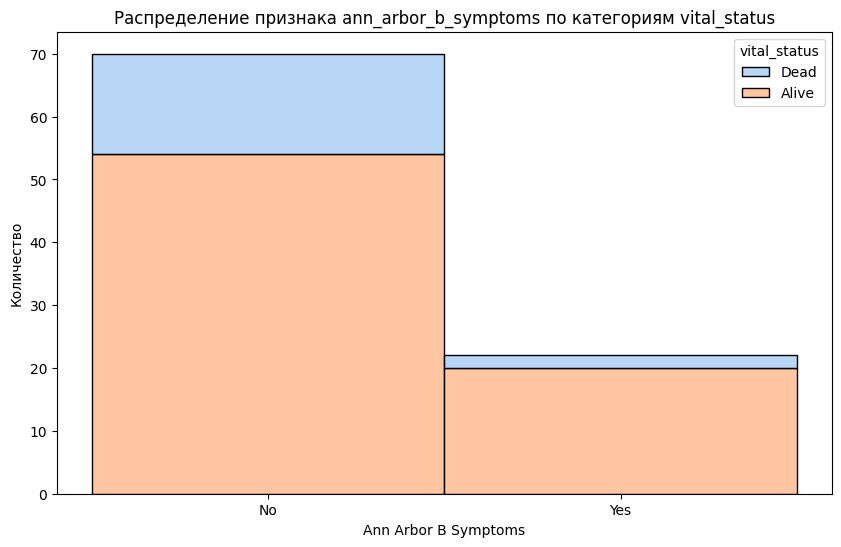

In [ ]:
# Построение гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data=clinical_info, x='ann_arbor_b_symptoms', hue='vital_status', multiple='stack', palette='pastel')

plt.title('Распределение признака ann_arbor_b_symptoms по категориям vital_status')
plt.xlabel('Ann Arbor B Symptoms')
plt.ylabel('Количество')

In [ ]:
missing_ann_arbor_b_symptoms = clinical_info[clinical_info['ann_arbor_b_symptoms'].isnull()]

print(missing_ann_arbor_b_symptoms['vital_status'])

16    Alive
17    Alive
32    Alive
33    Alive
Name: vital_status, dtype: object


Незаполненные признаки ann_arbor_b_symptoms со статусом Alive. С данным статусом распределение ann_arbor_b_symptoms ~ No 62%, Yes 37%. Заполним значением No.

In [ ]:
clinical_info['ann_arbor_b_symptoms'] = clinical_info['ann_arbor_b_symptoms'].fillna('No')



---

ann_arbor_clinical_stage


---



In [ ]:
clinical_info.groupby('vital_status')['ann_arbor_clinical_stage'].value_counts()

vital_status  ann_arbor_clinical_stage
Alive         Stage II                    30
              Stage IV                    18
              Stage I                     14
              Stage III                    8
Dead          Stage IV                     6
              Stage II                     4
              Stage I                      2
              Stage III                    2
Name: count, dtype: int64

In [ ]:
missing_ann_arbor_clinical_stage = clinical_info[clinical_info['ann_arbor_clinical_stage'].isnull()]
print(missing_ann_arbor_clinical_stage['vital_status'])

2      Dead
3      Dead
16    Alive
17    Alive
28     Dead
29     Dead
32    Alive
33    Alive
40    Alive
41    Alive
70    Alive
71    Alive
Name: vital_status, dtype: object


Умершим ставим Stage IV (моду), живым - Stage II (моду).

In [ ]:
clinical_info.loc[(clinical_info['vital_status'] == 'Dead') & clinical_info['ann_arbor_clinical_stage'].isnull(), 'ann_arbor_clinical_stage'] = 'Stage IV'
clinical_info.loc[(clinical_info['vital_status'] == 'Alive') & clinical_info['ann_arbor_clinical_stage'].isnull(), 'ann_arbor_clinical_stage'] = 'Stage II'



---

ann_arbor_extranodal_involvement


---



In [ ]:
clinical_info.groupby('vital_status')['ann_arbor_extranodal_involvement'].value_counts()

vital_status  ann_arbor_extranodal_involvement
Alive         No                                  40
              Yes                                 34
Dead          No                                  10
              Yes                                  8
Name: count, dtype: int64

In [ ]:
missing_ann_arbor_extranodal_involvement = clinical_info[clinical_info['ann_arbor_extranodal_involvement'].isnull()]
print(missing_ann_arbor_extranodal_involvement['vital_status'])

16    Alive
17    Alive
32    Alive
33    Alive
Name: vital_status, dtype: object


Заменяем значение NaN на No. На моду.

In [ ]:
clinical_info['ann_arbor_extranodal_involvement'] = clinical_info['ann_arbor_extranodal_involvement'].fillna('No')




---

days_to_last_follow_up


---



In [ ]:
clinical_info.groupby('vital_status')['days_to_last_follow_up'].value_counts()

vital_status  days_to_last_follow_up
Alive         132                       4
              1581                      4
              0                         2
              791                       2
              679                       2
              719                       2
              730                       2
              749                       2
              751                       2
              765                       2
              788                       2
              946                       2
              832                       2
              553                       2
              965                       2
              972                       2
              982                       2
              5980                      2
              427                       2
              4578                      2
              17                        2
              1081                      2
              1163                     

In [ ]:
missing_days_to_last_follow_up = clinical_info[clinical_info['days_to_last_follow_up'].isnull()]
print(missing_days_to_last_follow_up['vital_status'])

4     Dead
5     Dead
22    Dead
23    Dead
28    Dead
29    Dead
42    Dead
43    Dead
86    Dead
87    Dead
Name: vital_status, dtype: object


Поставим среднее значение у умерших пациентов = 927.

In [ ]:
clinical_info['days_to_last_follow_up'] = clinical_info['days_to_last_follow_up'].fillna(927)


In [ ]:
clinical_info # очищенный датасет

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,prior_malignancy,prior_treatment,progression_or_recurrence,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
0,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2013,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,Yes
1,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,61,-22454,248,not hispanic or latino,female,asian,Dead,1952,2013,...,No,No,not reported,Intra-abdominal lymph nodes,No,Intra-abdominal lymph nodes,not reported,2013,No,Yes
2,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2014,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,Yes
3,0bf573ac-cd1e-42d8-90cf-b30d7b08679c,73,-27025,58,not hispanic or latino,male,asian,Dead,1940,2014,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2013,No,Yes
4,0e251c03-bf86-4ed8-b45d-3cbc97160502,27,-10075,391,hispanic or latino,female,white,Dead,1984,2012,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,f8cf647b-1447-4ac3-8c43-bef07765cabf,52,-19238,0,not hispanic or latino,male,white,Alive,1957,NaN,...,No,No,not reported,Specified parts of peritoneum,No,Specified parts of peritoneum,not reported,2009,No,Yes
92,f978cb0f-d319-4c01-b4c5-23ae1403a106,38,-13996,0,not hispanic or latino,female,asian,Alive,1973,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,Yes
93,f978cb0f-d319-4c01-b4c5-23ae1403a106,38,-13996,0,not hispanic or latino,female,asian,Alive,1973,NaN,...,No,No,not reported,"Lymph nodes of head, face and neck",No,"Lymph nodes of head, face and neck",not reported,2011,No,Yes
94,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,77,-28474,0,hispanic or latino,female,white,Alive,1928,NaN,...,No,No,not reported,Lymph nodes of inguinal region or leg,No,Lymph nodes of inguinal region or leg,not reported,2005,No,Yes


## EDA



---

удаление колонок с одним значением во всех строках


---



In [ ]:
clinical_info_lst = [i for i in clinical_info.columns if clinical_info[i].nunique() != 1]
clinical_info = clinical_info[clinical_info_lst]



---

разделение признаков по типам


---



In [ ]:
clinical_info.columns

Index(['case_id', 'age_at_index', 'days_to_birth', 'days_to_death',
       'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth',
       'year_of_death', 'age_at_diagnosis', 'ann_arbor_b_symptoms',
       'ann_arbor_clinical_stage', 'ann_arbor_extranodal_involvement',
       'days_to_last_follow_up', 'icd_10_code', 'prior_treatment',
       'site_of_resection_or_biopsy', 'tissue_or_organ_of_origin',
       'year_of_diagnosis', 'treatment_Radiation', 'treatment_Pharmaceutical'],
      dtype='object')

In [ ]:
continuous_features = ['age_at_index', 'days_to_birth', 'days_to_death',
                       'year_of_birth', 'year_of_death', 'age_at_diagnosis',
                       'days_to_last_follow_up', 'year_of_diagnosis']

categorical_features = [i for i in clinical_info.columns if i not in continuous_features]

числовые признаки приведём к типу float, категориальные - к category

In [ ]:
for i in continuous_features:
    clinical_info[i] = clinical_info[i].astype('float')

for i in categorical_features:
    clinical_info[i] = clinical_info[i].astype('category')

## Числовые признаки

In [ ]:
clinical_info[continuous_features].describe()

,age_at_index,days_to_birth,days_to_death,year_of_birth,year_of_death,age_at_diagnosis,days_to_last_follow_up,year_of_diagnosis
count,96.000000,96.000000,96.000000,96.000000,18.000000,96.000000,96.000000,96.000000
mean,56.270833,-20731.354167,282.145833,1952.875000,2008.777778,20731.354167,1238.187500,2009.145833
std,13.874231,5080.518956,1054.532513,15.092173,4.917622,5080.518956,1241.554402,5.005217
min,23.000000,-30256.000000,0.000000,1923.000000,2001.000000,8493.000000,0.000000,1987.000000
25%,46.000000,-24607.750000,0.000000,1941.000000,2004.000000,16998.250000,528.750000,2009.000000
50%,57.500000,-21146.500000,0.000000,1951.500000,2012.000000,21146.500000,927.000000,2011.000000
75%,67.000000,-16998.250000,0.000000,1963.250000,2012.000000,24607.750000,1425.000000,2012.000000
max,82.000000,-8493.000000,6425.000000,1987.000000,2014.000000,30256.000000,5980.000000,2013.000000


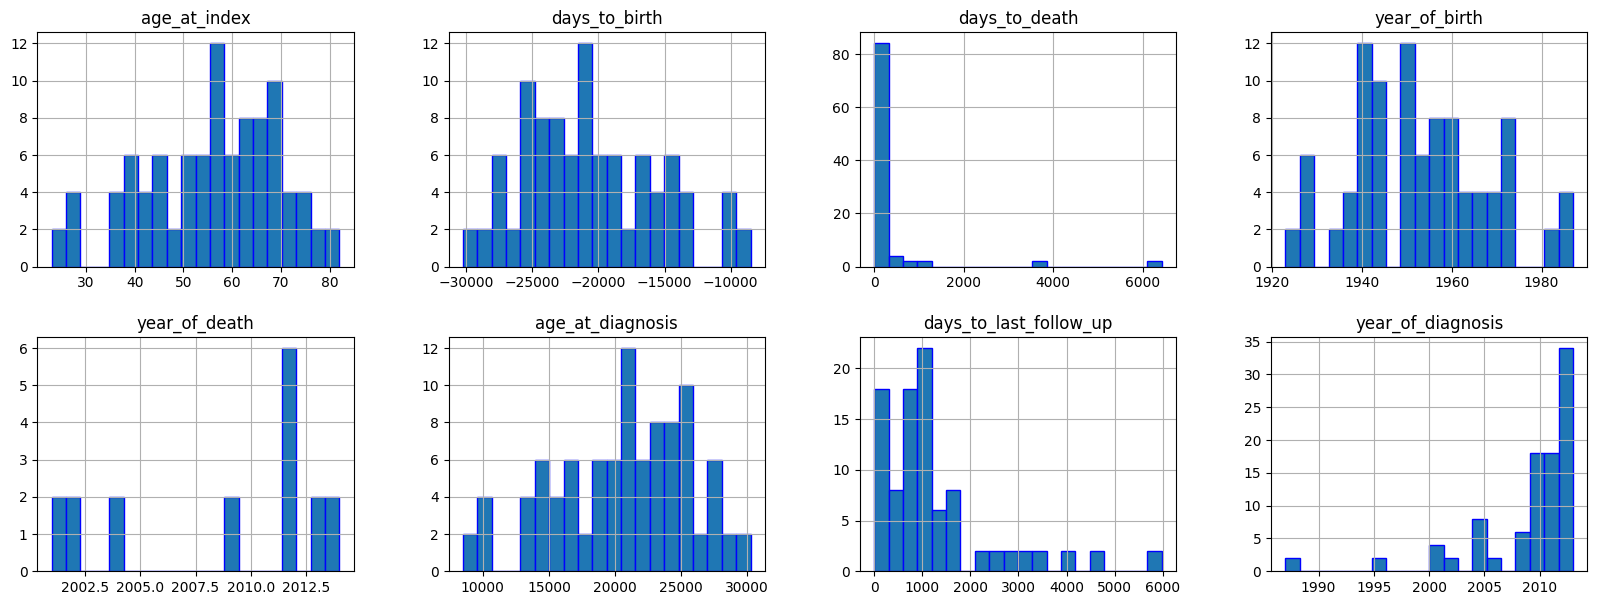

In [ ]:
clinical_info[continuous_features].hist(layout=(-1, 4), figsize=(20, 7), bins=20, edgecolor='b');

age at index: возраст пациента при записи в базу данных, распределение стремится к нормальному, есть два пика, пациенты в основном возрастные.

days to birth: количество дней от рождения,фактически возраст,  отрицательная величина, практически симметричное распределение относительно распределению age at index.

days to death: количество дней до смерти, очень разбросанные значения, здесь есть много NaN, т.к. большинство пациентов живы.

age at diagnosis: возраст постановки диагноза вычисляется в днях, имеет нормальное распределение.

days to last follow up: дни до последнего осмотра, распределение смещено вправо, большинство пациентов чаще ходят на осмотры.

year of diagnosis: год постановки диагноза, распределение смещено влево, большинство диагнозов поставлено в последнее время.






---

Признаки очень неоднородные. Необходимо масштабирование.


---





---

age_at_index


---



Text(0.5, 0, 'age_at_index')

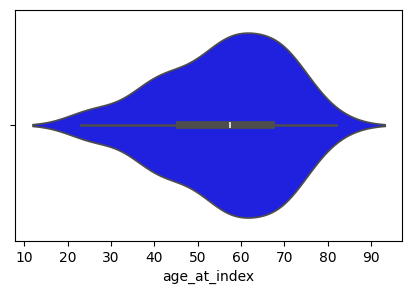

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['age_at_index'], orient='h', color='b')
plt.xlabel('age_at_index')

выбросов не наблюдается, распределение нормальное

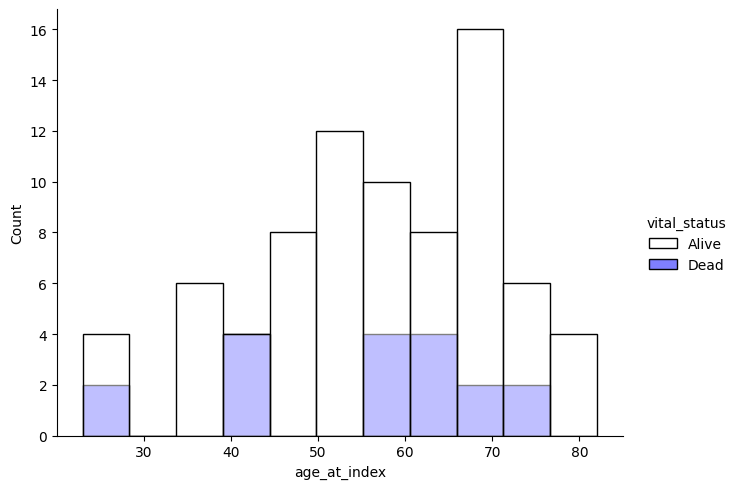

In [ ]:
palette = {'Dead': 'blue', 'Alive': 'white'}

sns.displot(data=clinical_info,
            x='age_at_index',
            hue='vital_status',
            bins=11,
            palette=palette,
            kind='hist',
            aspect=1.3,
            legend=True)




---

days_to_birth


---



Text(0.5, 0, 'days_to_birth')

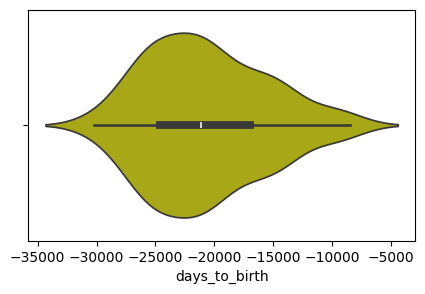

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['days_to_birth'], orient='h', color='y')
plt.xlabel('days_to_birth')

выбросов не наблюдается, распределение нормальное

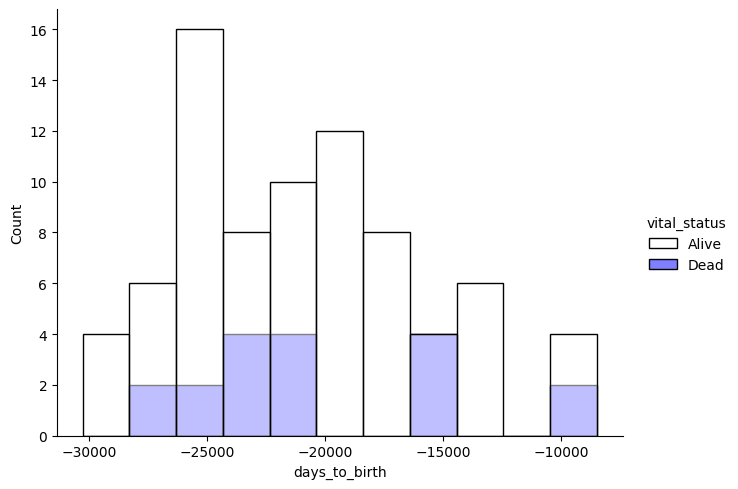

In [ ]:
palette = {'Dead': 'blue', 'Alive': 'white'}

sns.displot(data=clinical_info,
            x='days_to_birth',
            hue='vital_status',
            bins=11,
            palette=palette,
            kind='hist',
            aspect=1.3,
            legend=True)



---

проверим мультиколлениарность между признаками


---



In [ ]:
# Расчет коэффициента корреляции
correlation = clinical_info['age_at_index'].corr(clinical_info['days_to_birth'])

# Вывод результата
print(f"Коэффициент корреляции между 'age_at_index' и 'days_to_birth': {correlation}")

Коэффициент корреляции между 'age_at_index' и 'days_to_birth': -0.9998391198814865


признаки практически одинаковые, можно пренебречь одним при обучении модели



---


days_to_death


---



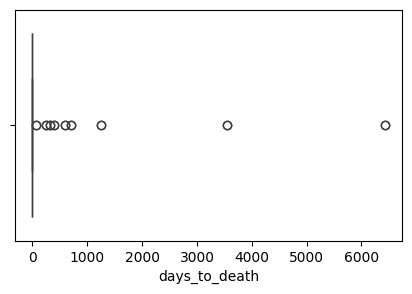

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['days_to_death'], orient='h')
plt.xlabel('days_to_death');

наблюдаются два выброса

In [ ]:
# Фильтрация пациентов, у которых days_to_death > 1000
patients_long_lived = clinical_info[clinical_info['days_to_death'] > 1000]

# Извлечение года рождения для этих пациентов
years_of_birth = patients_long_lived['year_of_birth']

print(years_of_birth)

28    1929.0
29    1929.0
42    1963.0
43    1963.0
50    1935.0
51    1935.0
Name: year_of_birth, dtype: float64


скорей всего это реальные данные, исходя из года рождения

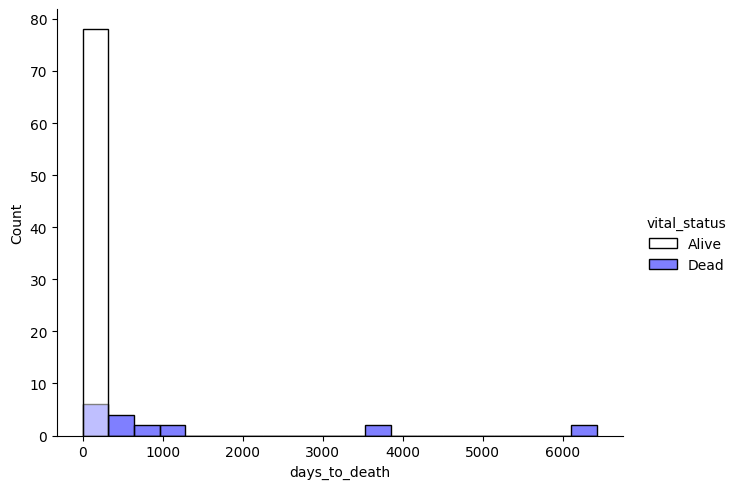

In [ ]:
palette = {'Dead': 'blue', 'Alive': 'white'}

sns.displot(data=clinical_info,
            x='days_to_death',
            hue='vital_status',
            bins=20,
            palette=palette,
            kind='hist',
            aspect=1.3,
            legend=True)

In [ ]:
vital_status_and_days_to_death = clinical_info[['vital_status', 'days_to_death']]

print(vital_status_and_days_to_death.to_string())

   vital_status  days_to_death
0          Dead          248.0
1          Dead          248.0
2          Dead           58.0
3          Dead           58.0
4          Dead          391.0
5          Dead          391.0
6         Alive            0.0
7         Alive            0.0
8         Alive            0.0
9         Alive            0.0
10        Alive            0.0
11        Alive            0.0
12        Alive            0.0
13        Alive            0.0
14        Alive            0.0
15        Alive            0.0
16        Alive            0.0
17        Alive            0.0
18        Alive            0.0
19        Alive            0.0
20        Alive            0.0
21        Alive            0.0
22         Dead          595.0
23         Dead          595.0
24        Alive            0.0
25        Alive            0.0
26        Alive            0.0
27        Alive            0.0
28         Dead         6425.0
29         Dead         6425.0
30        Alive            0.0
31      

In [ ]:
clinical_info[(clinical_info['vital_status'] == 'Dead') & (clinical_info['days_to_death'] > 3000)]

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
28,3f5a897d-1eaa-4d4c-8324-27ac07c90927,58.0,-21272.0,6425.0,not hispanic or latino,male,white,Dead,1929.0,2004.0,...,Stage IV,Yes,927.0,C83.3,Yes,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,1987.0,No,Yes
29,3f5a897d-1eaa-4d4c-8324-27ac07c90927,58.0,-21272.0,6425.0,not hispanic or latino,male,white,Dead,1929.0,2004.0,...,Stage IV,Yes,927.0,C83.3,Yes,Intra-abdominal lymph nodes,Intra-abdominal lymph nodes,1987.0,No,Yes
50,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,2002.0,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,No,Yes
51,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,2002.0,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,No,Yes




---
Два человека с очень большим количеством дней до сметри (17 лет и 9 лет). Вероятно новообразование удалось купировать или удалить. Но произошел рецидив.

Общее: оба мужчины, не было лечения с облучением, только фармацевтикой.


---






---

year_of_birth


---



Text(0.5, 0, 'year_of_birth')

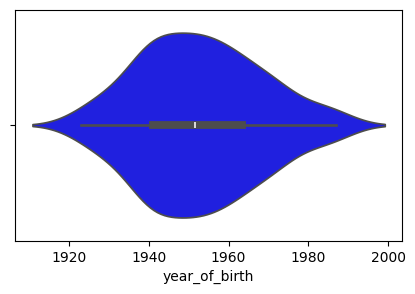

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['year_of_birth'], orient='h', color='b')
plt.xlabel('year_of_birth')

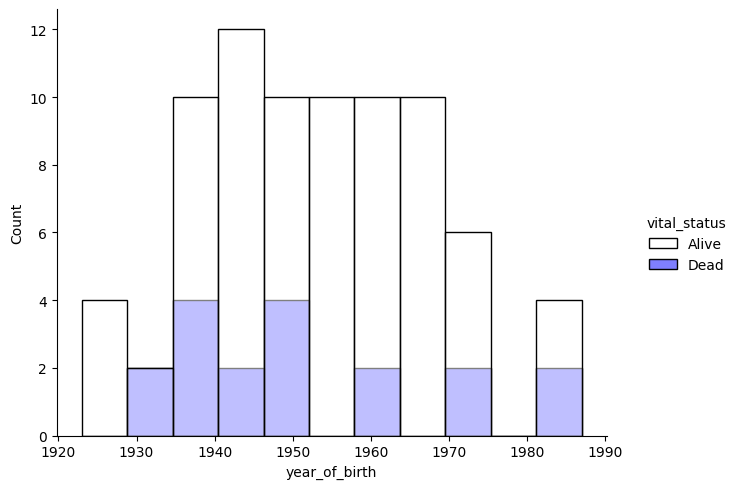

In [ ]:
palette = {'Dead': 'blue', 'Alive': 'white'}

sns.displot(data=clinical_info,
            x='year_of_birth',
            hue='vital_status',
            bins=11,
            palette=palette,
            kind='hist',
            aspect=1.3,
            legend=True)

распределение нормальное



---

year_of_death


---



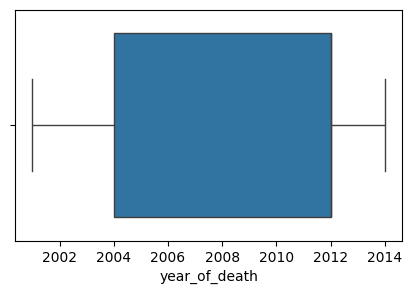

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['year_of_death'], orient='h')
plt.xlabel('year_of_death');

Text(0.5, 0, 'year_of_death')

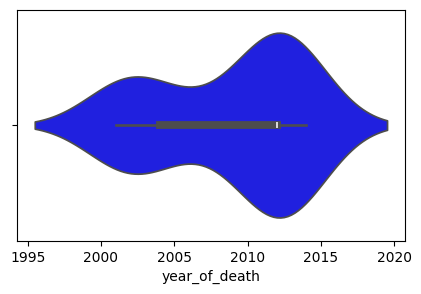

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(clinical_info['year_of_death'], orient='h', color='b')
plt.xlabel('year_of_death')



---

age_at_diagnosis


---



Text(0.5, 0, 'age_at_diagnosis')

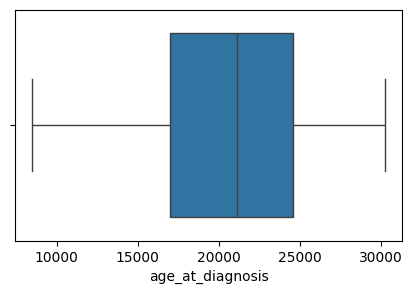

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['age_at_diagnosis'], orient='h')
plt.xlabel('age_at_diagnosis')

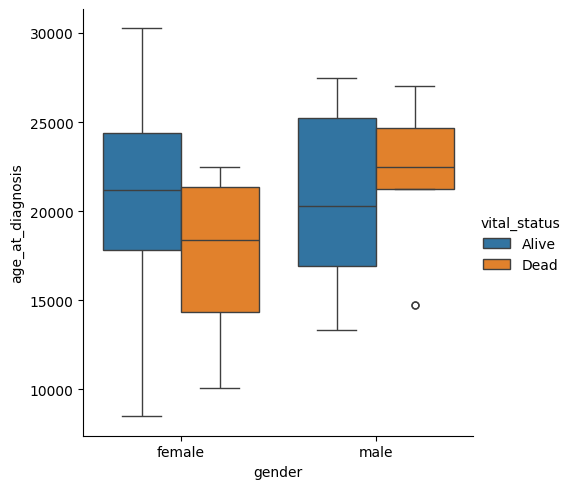

In [ ]:
sns.catplot(data=clinical_info,
            x="gender",
            y="age_at_diagnosis",
            hue='vital_status',
            kind="box")

Видно, что женщины, которым поставили диагноз от 40 до 50 лет умирают чаще, чем женщины более старшего возраста. От 50 до 60 шансы 50/50. После 60 - вылечиваются. Вероятно, потому что более молодые не проводят регулярную диагностику, чем женщины преклонного возраста.

У мужчин наоборот, умирают представители за 60 (шансы 50/50). До 60 - вылечиваются.

Женщины заболевают раньше по возрасту.



---

days_to_last_follow_up


---



Text(0.5, 0, 'days_to_last_follow_up')

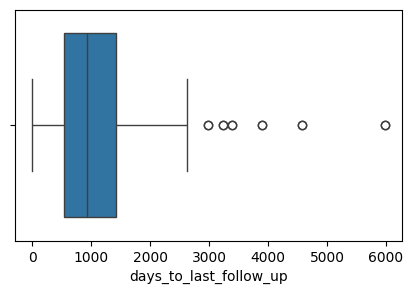

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['days_to_last_follow_up'], orient='h')
plt.xlabel('days_to_last_follow_up')

In [ ]:
# Фильтрация пациентов, у которых days_to_death > 1000
patients = clinical_info[clinical_info['days_to_last_follow_up'] > 3000]

# Извлечение года рождения для этих пациентов
days_to_last_follow_up = patients['days_to_last_follow_up']

print(days_to_last_follow_up)

12    3897.0
13    3897.0
26    5980.0
27    5980.0
46    4578.0
47    4578.0
50    3227.0
51    3227.0
94    3394.0
95    3394.0
Name: days_to_last_follow_up, dtype: float64


In [ ]:
patients

,case_id,age_at_index,days_to_birth,days_to_death,ethnicity,gender,race,vital_status,year_of_birth,year_of_death,...,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,days_to_last_follow_up,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,year_of_diagnosis,treatment_Radiation,treatment_Pharmaceutical
12,1ea575f1-f731-408b-a629-f5f4abab569e,45.0,-16720.0,0.0,hispanic or latino,male,white,Alive,1959.0,NaN,...,Stage II,No,3897.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2004.0,Yes,No
13,1ea575f1-f731-408b-a629-f5f4abab569e,45.0,-16720.0,0.0,hispanic or latino,male,white,Alive,1959.0,NaN,...,Stage II,No,3897.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2004.0,No,Yes
26,3622cf29-600f-4410-84d4-a9afeb41c475,67.0,-24569.0,0.0,not hispanic or latino,male,white,Alive,1929.0,NaN,...,Stage III,No,5980.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",1996.0,No,Yes
27,3622cf29-600f-4410-84d4-a9afeb41c475,67.0,-24569.0,0.0,not hispanic or latino,male,white,Alive,1929.0,NaN,...,Stage III,No,5980.0,C83.3,No,"Lymph nodes of head, face and neck","Lymph nodes of head, face and neck",1996.0,No,Yes
46,7a589441-11ef-4158-87e7-3951d86bc2aa,56.0,-20812.0,0.0,not hispanic or latino,female,white,Alive,1945.0,NaN,...,Stage I,Yes,4578.0,C83.3,No,Thyroid gland,Thyroid gland,2001.0,No,Yes
47,7a589441-11ef-4158-87e7-3951d86bc2aa,56.0,-20812.0,0.0,not hispanic or latino,female,white,Alive,1945.0,NaN,...,Stage I,Yes,4578.0,C83.3,No,Thyroid gland,Thyroid gland,2001.0,Yes,No
50,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,2002.0,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,No,Yes
51,a468e725-ad4b-411d-ac5c-2eacc68ec580,67.0,-24661.0,3553.0,not hispanic or latino,male,white,Dead,1935.0,2002.0,...,Stage III,No,3227.0,C77.1,No,Intrathoracic lymph nodes,Intrathoracic lymph nodes,2002.0,No,Yes
94,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,77.0,-28474.0,0.0,hispanic or latino,female,white,Alive,1928.0,NaN,...,Stage III,No,3394.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005.0,No,Yes
95,fdecb74f-ac4e-46b1-b23a-5f7fde96ef9f,77.0,-28474.0,0.0,hispanic or latino,female,white,Alive,1928.0,NaN,...,Stage III,No,3394.0,C83.3,No,Lymph nodes of inguinal region or leg,Lymph nodes of inguinal region or leg,2005.0,No,Yes


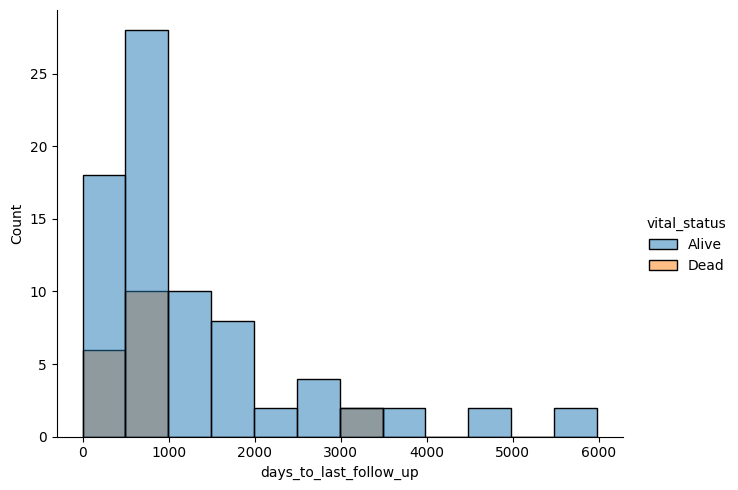

In [ ]:
sns.displot(data=clinical_info,
            x=clinical_info['days_to_last_follow_up'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

Большие значения количества дней от последнего осмотра имеют места быть, исходя из года постановки диагноза.



---

year_of_diagnosis


---



Text(0.5, 0, 'year_of_diagnosis')

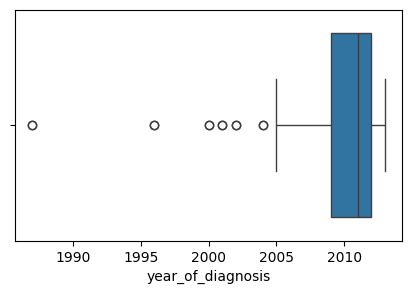

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(clinical_info['year_of_diagnosis'], orient='h')
plt.xlabel('year_of_diagnosis')

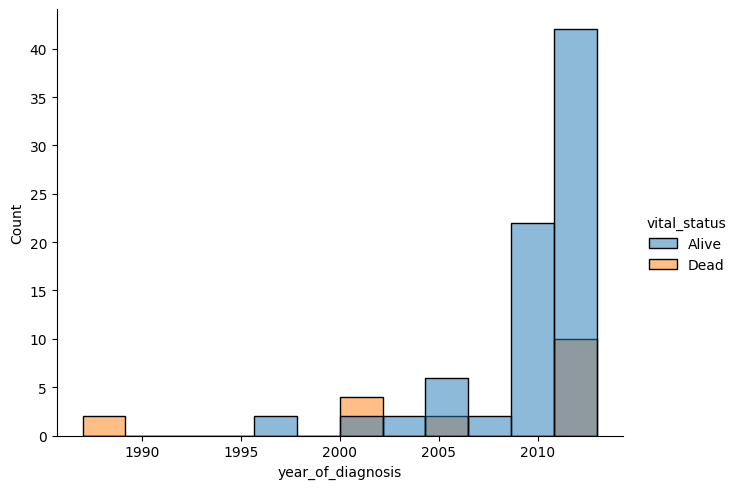

In [ ]:
sns.displot(data=clinical_info,
            x=clinical_info['year_of_diagnosis'],
            legend=True,
            aspect=1.3,
            bins=12,
            hue=clinical_info['vital_status'],
            kind='hist')

Считаю, что выбросов нет. Вполне реальные данные. Большинство диагнозов было поставлено в последнее время. Пациенты с "древними" диагнозами умерли.

## Тепловая карта корреляции Пирсона

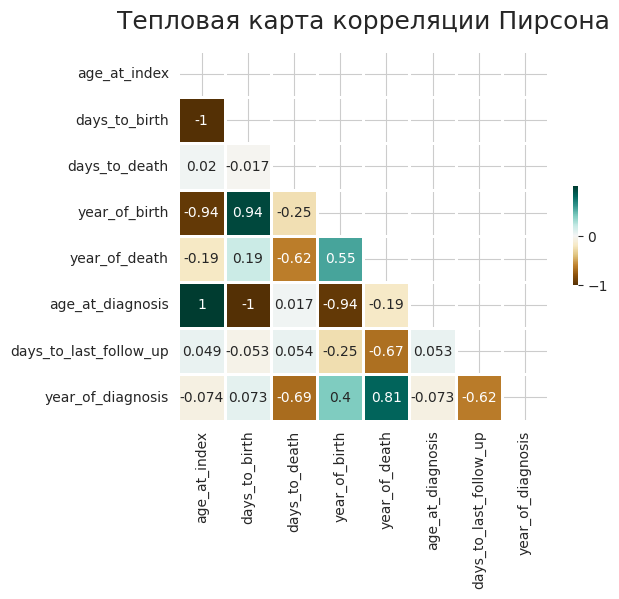

In [ ]:
sns.set_style("whitegrid")

mask = np.triu(np.ones_like(clinical_info.corr(numeric_only=True), dtype=bool))

heatmap = sns.heatmap(
    clinical_info.corr(numeric_only=True).round(4),
    annot=True,
    square=True,
    cmap="BrBG",
    cbar_kws={"fraction": 0.01},
    linewidth=1,

    mask=mask,
)

heatmap.set_title(
    "Тепловая карта корреляции Пирсона", fontdict={"fontsize": 18}, pad=16
);

Прямая корреляция:

1:    age_at_diagnosis и age_at_index (неинформативно)

0,94: year_of_birth и days_to_birth (неинформативно)

0,81: year_of_diagnosis и year_of_death (в большинстве случаев диагноз ставят незадолго до смерти)

Обратная корреляция:

-1:    days_to_birth и age_at_index (неинформативно)

-1:    age_at_diagnosis и days_to_birth (неинформативно)

-0,94: year_of_birth и age_at_index (неинформативно)

-0,94: age_at_diagnosis и year_of_birth (старикам ставят диагноз в конце жизни, средний возраст получает диагноз раньше приклонного возраста)

## Категориальные признаки

In [ ]:
clinical_info.describe(include='category').T

,count,unique,top,freq
case_id,96,48,0030a28c-81aa-44b0-8be0-b35e1dcbf98c,2
ethnicity,96,2,not hispanic or latino,72
gender,96,2,female,52
race,96,3,white,58
vital_status,96,2,Alive,78
ann_arbor_b_symptoms,96,2,No,74
ann_arbor_clinical_stage,96,4,Stage II,42
ann_arbor_extranodal_involvement,96,2,No,54
icd_10_code,96,10,C83.3,76
prior_treatment,96,2,No,94


In [ ]:
def show_cat_feat(feat, labels=None, title=None, aspect=1, pie=False, h=6, w=4):
    plt.figure(figsize=(h,w))

    print(f'Наличие пропусков: {clinical_info[feat].isna().any()}')

    if pie:
        clinical_info[feat].value_counts().plot.pie(autopct = '%1.3f%%', shadow = True,
                                                            # labels=labels
                                                            ).set(title=title)

    sns.displot(data=clinical_info,
                x=clinical_info[feat],
                legend=True,
                aspect=aspect,
                hue=clinical_info['vital_status'],
                kind='hist').set(title=title)



---
ethnicity


---



Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

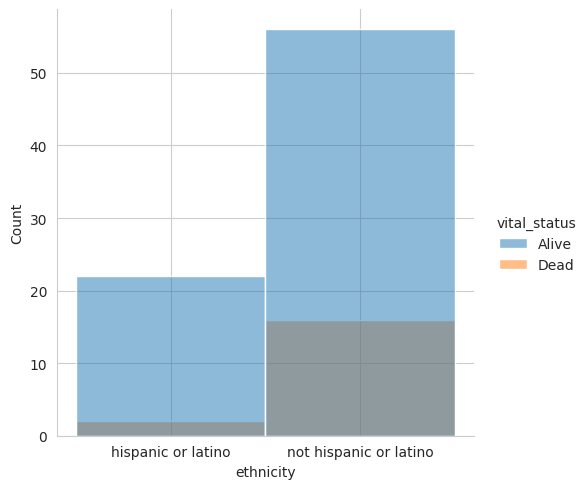

In [ ]:
title = "Этническая принадлежность"

show_cat_feat('ethnicity', title)

в пропорции испанцы или латины умирают реже, чем другая этническая группа



---
gender


---




Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

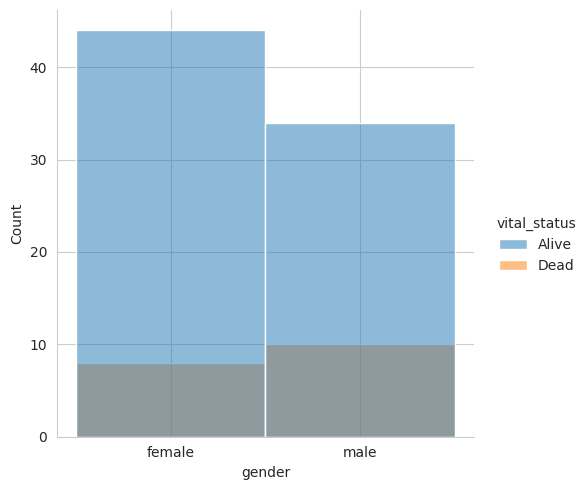

In [ ]:
title = "Гендер"

show_cat_feat('gender', title)

женщины умирают реже, чем мужчины



---
race


---




Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

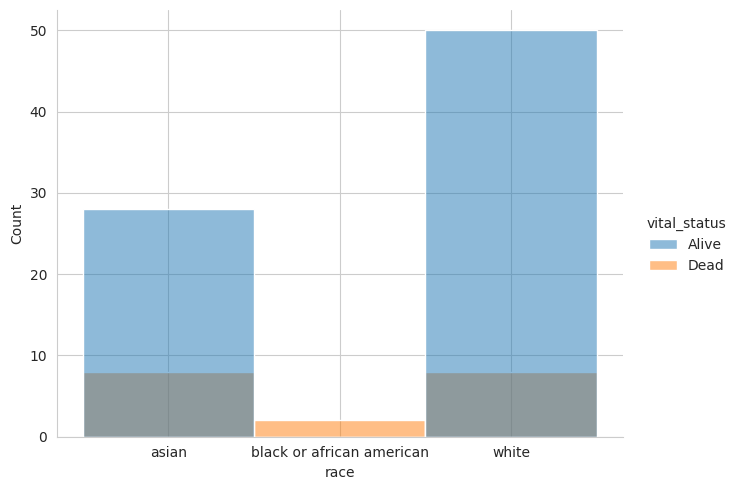

In [ ]:
title = "Раса"

show_cat_feat('race', title, aspect=1.3)

Шансы выжить у "белой" расы выше всех. У негроидной расы нет выживших, это объясняется недостаточным количеством данных.



---

ann_arbor_clinical_stage


---



Наличие пропусков: False


<Figure size 1000x800 with 0 Axes>

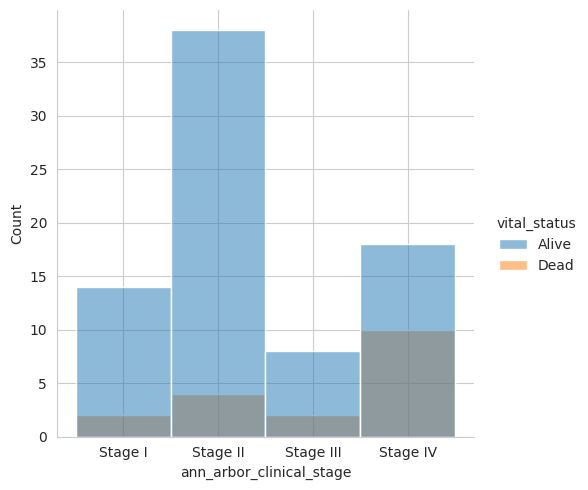

In [ ]:
title = "Клиническая стадия"

show_cat_feat('ann_arbor_clinical_stage', title, h=10, w=8)

На 4-й стадии смертность выше всего, это ожидаемо.

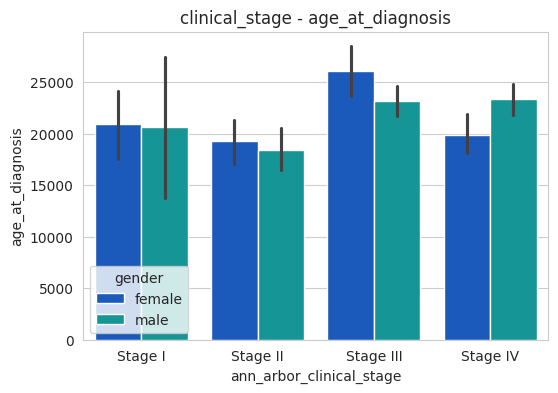

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='ann_arbor_clinical_stage',
            y='age_at_diagnosis',
            hue='gender',
            data = clinical_info,
            palette='winter')
plt.title('clinical_stage - age_at_diagnosis')
plt.show();

диагноз ставят примерно в одном возрасте

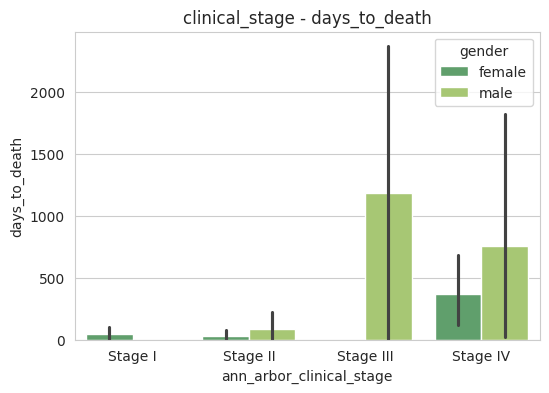

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='ann_arbor_clinical_stage',
            y='days_to_death',
            hue='gender',
            data = clinical_info,
            palette='summer')
plt.title('clinical_stage - days_to_death')
plt.show();

Количество дней до смерти (от постановки диагноза до смерти) больше на 3 и 4 стадиях. Это удивительно.



---

icd_10_code


---



Наличие пропусков: False


<Figure size 600x400 with 0 Axes>

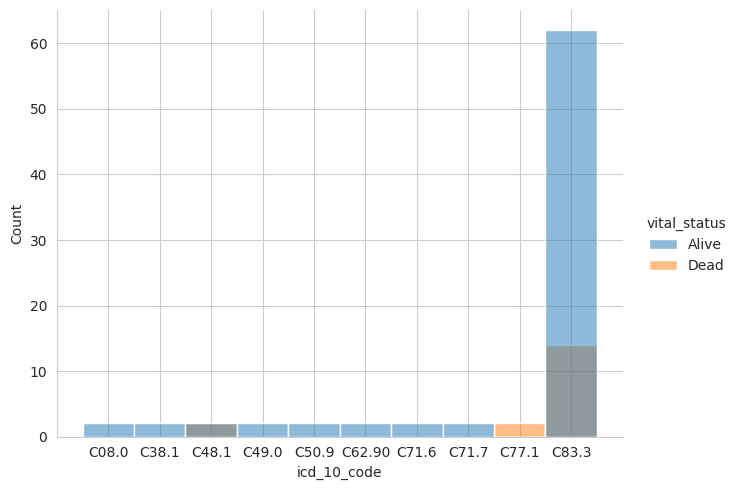

In [ ]:
title = "Кодировка"

show_cat_feat('icd_10_code', title, aspect=1.3)

Код C83.3 «Крупноклеточная (диффузная) неходжкинская лимфома»



---

site_of_resection_or_biopsy

---


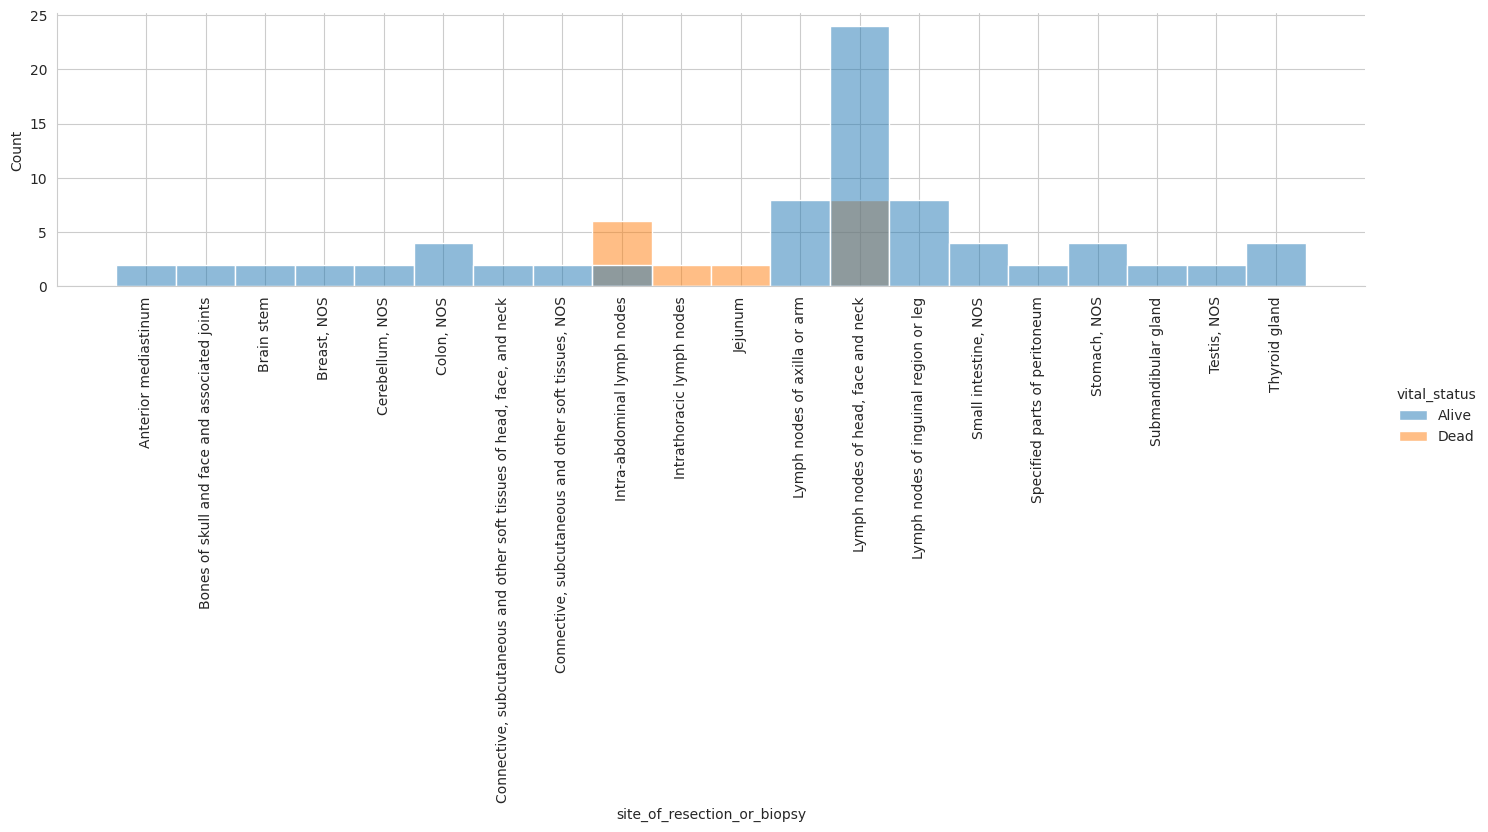

In [ ]:
his = sns.displot(data=clinical_info,
                x=clinical_info['site_of_resection_or_biopsy'],
                legend=True,
                height=3.5,
                aspect=4,
                hue=clinical_info['vital_status'],
                kind='hist')
plt.xticks(rotation=90);

Смертоностные участки биопсии: внутрибрюшные лимфатические узлы, внутригрудные лимфатические узлы, тощая кишка, лимфатические узлы головы, лица и шеи.

## V-мера Крамера

In [ ]:
cramersv = am.CramersV(clinical_info[categorical_features].drop('case_id', axis=1))
cramersv.fit()

,ethnicity,gender,race,vital_status,ann_arbor_b_symptoms,ann_arbor_clinical_stage,ann_arbor_extranodal_involvement,icd_10_code,prior_treatment,site_of_resection_or_biopsy,tissue_or_organ_of_origin,treatment_Radiation,treatment_Pharmaceutical
ethnicity,1.000000,0.048280,0.467323,0.154083,0.200327,0.301671,0.412189,0.486664,0.084215,0.786165,0.786165,0.324467,0.357460
gender,0.048280,1.000000,0.139181,0.093734,0.294302,0.296836,0.200178,0.425105,0.158572,0.629963,0.629963,0.111544,0.132997
race,0.467323,0.139181,1.000000,0.320920,0.148134,0.274003,0.168045,0.317215,0.118067,0.601523,0.601523,0.171487,0.159489
vital_status,0.154083,0.093734,0.320920,1.000000,0.134933,0.289696,0.006725,0.388197,0.303642,0.697982,0.697982,0.103407,0.092450
ann_arbor_b_symptoms,0.200327,0.294302,0.148134,0.134933,1.000000,0.584640,0.418415,0.361935,0.267520,0.617119,0.617119,0.132837,0.120581
ann_arbor_clinical_stage,0.301671,0.296836,0.274003,0.289696,0.584640,1.000000,0.459551,0.427699,0.227314,0.658977,0.658977,0.149684,0.135917
ann_arbor_extranodal_involvement,0.412189,0.200178,0.168045,0.006725,0.418415,0.459551,1.000000,0.394547,0.165395,0.720082,0.720082,0.117523,0.118345
icd_10_code,0.486664,0.425105,0.317215,0.388197,0.361935,0.427699,0.394547,1.000000,0.074827,0.977824,0.977824,0.206965,0.214779
prior_treatment,0.084215,0.158572,0.118067,0.303642,0.267520,0.227314,0.165395,0.074827,1.000000,0.483779,0.483779,0.055132,0.052473
site_of_resection_or_biopsy,0.786165,0.629963,0.601523,0.697982,0.617119,0.658977,0.720082,0.977824,0.483779,1.000000,1.000000,0.595460,0.584732


Повышенная корреляция к практически ко всем признакам у места биопсии и органа происхождения рака.

## Целевая переменная vital_status

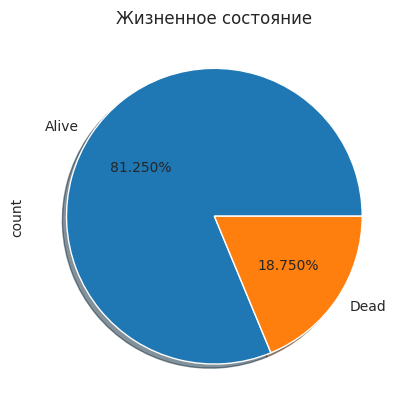

In [ ]:
title = 'Жизненное состояние'
clinical_info['vital_status'].value_counts().plot.pie(autopct = '%1.3f%%', shadow=True,
                                                            # labels=labels
                                                            ).set(title=title);

наблюдается дисбаланс классов

## Таблица корреляции

In [ ]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.6 MB/s eta 0:00:00


In [ ]:
import phik
from phik.report import plot_correlation_matrix

interval columns not set, guessing: ['age_at_index', 'days_to_birth', 'days_to_death', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'days_to_last_follow_up', 'year_of_diagnosis']


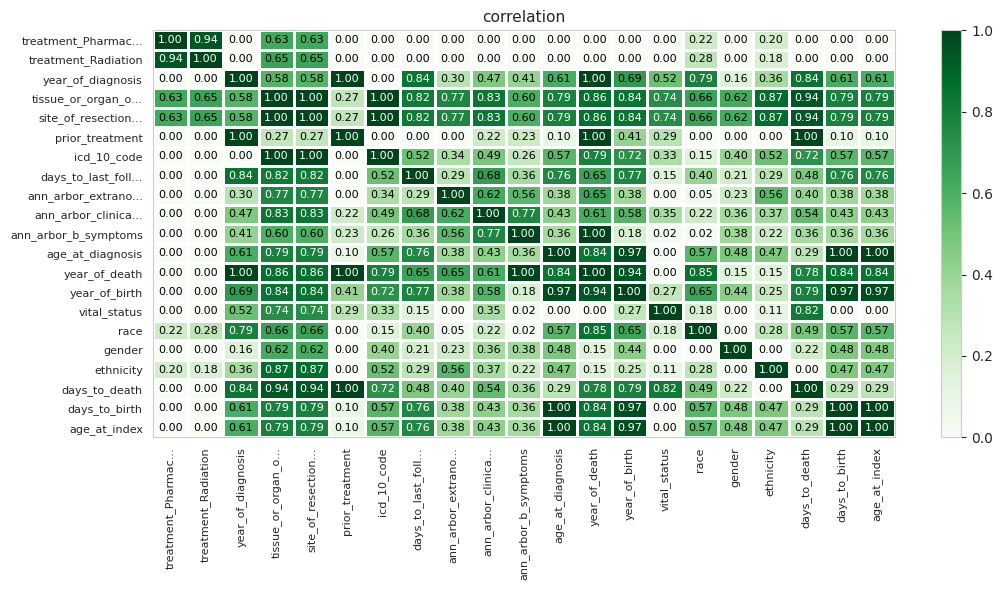

In [ ]:
phik_overview = clinical_info.drop('case_id', axis=1).phik_matrix().round(2)

phik.report.plot_correlation_matrix(phik_overview.values,
                        x_labels=phik_overview.columns,
                        y_labels=phik_overview.index,
                        vmin=0, vmax=1, color_map="Greens",
                        title=r"correlation",
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

Высокая корреляция целевого признака с органом происхождения образования, местом биопсии и количеством дней до смерти.

## Гипотезы

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
from scipy.stats import fisher_exact



---

Гипотеза 1.

Нулевая гипотеза: смертность при раке не зависит от органа происхождения новообразования.

Альтернативная гипотеза: смертность при раке зависит от органа происхождения новообразования.

Зависимая переменная - смертность.(категориальная)

Независимая переменная - орган происхождения рака.(категориальная)

In [ ]:
# таблица сопряженности
contingency_table = pd.crosstab(clinical_info['tissue_or_organ_of_origin'], clinical_info['vital_status'])
contingency_table

vital_status,Alive,Dead
tissue_or_organ_of_origin,,
Anterior mediastinum,2,0
Bones of skull and face and associated joints,2,0
Brain stem,2,0
"Breast, NOS",2,0
"Cerebellum, NOS",2,0
"Colon, NOS",4,0
"Connective, subcutaneous and other soft tissues of head, face, and neck",2,0
"Connective, subcutaneous and other soft tissues, NOS",2,0
Intra-abdominal lymph nodes,2,6


In [ ]:
# тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('chi2 =', chi2)
print('p =', p)
print('dof =', dof)
print('expected frequencies:\n', expected)

chi2 = 46.769230769230774
p = 0.000385338893804148
dof = 19
expected frequencies:
 [[ 1.625  0.375]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 3.25   0.75 ]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 6.5    1.5  ]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 6.5    1.5  ]
 [26.     6.   ]
 [ 6.5    1.5  ]
 [ 3.25   0.75 ]
 [ 1.625  0.375]
 [ 3.25   0.75 ]
 [ 1.625  0.375]
 [ 1.625  0.375]
 [ 3.25   0.75 ]]


Значение p-value = 0.000385338893804148. Это меньше уровня знчимости 0.05. Значит можно отвергать нулевую гипотезу. Смертность при раке зависит от органа происхождения новообразования.

Гипотеза 2.

Нулевая гипотеза: смертность при раке не зависит от пола пациента.

Альтернативная гипотеза: смертность при раке зависит от пола пациента.

Зависимая переменная - смертность.(категориальная)

Независимая переменная - пол пациента.(категориальная)

In [ ]:
# таблица сопряженности
contingency_table = pd.crosstab(clinical_info['gender'], clinical_info['vital_status'])
contingency_table

vital_status,Alive,Dead
gender,,
female,44,8
male,34,10


In [ ]:
# тест Фишера
if contingency_table.shape == (2, 2):
    oddsratio, p_value = fisher_exact(contingency_table)

    # Вывод результатов
    print(f"p-значение: {p_value}")

    # Интерпретация результата
    if p_value < 0.05:
        print("Отвергаем нулевую гипотезу: существует зависимость между полом пациента и смертностью.")
    else:
        print("Не отвергаем нулевую гипотезу: нет доказательств зависимости между полом пациента и смертностью.")
else:
    print("Тест Фишера подходит только для 2x2 таблиц.")

p-значение: 0.4350926497979327
Не отвергаем нулевую гипотезу: нет доказательств зависимости между полом пациента и смертностью.
